# Exploratory Data Analysis - The Manufacturing Process

### what is my aim with EDA? 
- Explore the dataset, understand what might be driving the machine failures.
- forecast when the machine might fail.

In [1]:
# My classes 
from manufacturing_eda_classes import LoadData, DataFrameInfo, DataTransform, Plotter, Models

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 

# Table of Contents

1. [The Data Set](#intro)
2. [Remove / impute missing values](#missing-values)
    1. [thought process]
3. [Investigating for Skewness in the data](#skew)
    1. [thought process]
4. [Removing Outliers from the Data](#outliers)
    1. [thought process]
5. [Investigating for Collinearity (Dropping overly correlated columns)](#collinearity)
    1. OLS & VIF 
    2. Chi-Squared Tests
    3. Logistic Model 


## 1) The Data Set
<a id="intro"></a>

In [3]:
# # Load the Data into a data frame 
# failure_data = pd.read_csv("failure_data.csv")

# # head of df 
# failure_data.head(3)


In [4]:
load_data = LoadData('failure_data.csv')  # Instantiate the class with your file name
failure_data_df = load_data.df  # Access the loaded DataFrame
failure_data_df.head(3)

File found: /Users/manishkhurmi/Desktop/EDA_project/failure_data.csv
DataFrame loaded successfully from /Users/manishkhurmi/Desktop/EDA_project/failure_data.csv.


,Unnamed: 0,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,3416,L50595,L,301.4,310.4,1579,36.9,133.0,0,0,0,0,0,0
1,1,7130,L54309,L,300.6,310.0,1635,31.0,107.0,0,0,0,0,0,0
2,2,2320,M17179,M,299.2,308.8,1700,33.5,185.0,0,0,0,0,0,0


In [5]:
info = DataFrameInfo(failure_data_df)
info.column_names()

Index(['Unnamed: 0', 'UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

Machine failure dataset data dictionary

- **UID**: Unique identifier of the machining session
- **product_ID**: Product specific serial number
- **Type**: Quality of the product being created L, M, or H, for low, medium and high quality products
- **air temperature [K]**: Average air temperature in the room during the process in Kelvin
- **process temperature [K]**:  Average air temperature the machine was operating at during production in Kelvin
- **Rotational speed [rpm]**: Average revolutions per minute the tool was operating at
- **Torque [Nm]**: Torque generated by the tool in Newton-meters
- **Tool wear [min]**: The current minutes of wear on the tool in minutes. H, M and L product manufacturing cause 5/3/2 minutes of tool wear. 
- **machine failure**: Label that indicates, whether the machine failed this particular run
- **TWF (tool wear failure)**: Failure in the process due to the tool wearing out
- **head dissipation failure (HDF)**: Lack of heat dissipation caused the process failure
- **power failure (PWF)**: Failure in the process due to lack of power from the tool to complete the process
- **overstrain failure (OSF)**: Failure due to the tool overstraining during the process
- **random failures (RNF)**: Failures in the process which couldn't be categorised

In [6]:
# Is UDI a unique key for the data?
info = DataFrameInfo(failure_data_df)
print(f'UDI is unique to every row of the data: {info.unique_value_count('UDI') == len(failure_data_df)}')

UDI is unique to every row of the data: True


- Drop `Unnamed: 0` is an unwanted index.
- Drop `Product ID` as we have `UDI`

In [7]:
# Drop columns if they exist 
dt = DataTransform(failure_data_df)
failure_data_df = dt.drop_column(vars=['Unnamed: 0', 'Product ID'])

failure_data_df.head(3)

Column List: 
 Index(['Unnamed: 0', 'UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

Column List After dropping df
: Index(['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')


,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,3416,L,301.4,310.4,1579,36.9,133.0,0,0,0,0,0,0
1,7130,L,300.6,310.0,1635,31.0,107.0,0,0,0,0,0,0
2,2320,M,299.2,308.8,1700,33.5,185.0,0,0,0,0,0,0


In [8]:
# Check the first row of the Data 
info = DataFrameInfo(failure_data_df)
# First row
info.return_first_row()

UDI                         3416
Type                           L
Air temperature [K]        301.4
Process temperature [K]    310.4
Rotational speed [rpm]      1579
Torque [Nm]                 36.9
Tool wear [min]            133.0
Machine failure                0
TWF                            0
HDF                            0
PWF                            0
OSF                            0
RNF                            0
Name: 0, dtype: object

In [9]:
# Initial information about the data 
print(f'The shape of the data is: {info.return_shape()}')

print('\n')
print(f'Initial information about the columns of the data: ')
print(info.return_info())

# transform.return_info()

The shape of the data is: (10000, 13)


Initial information about the columns of the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Type                     10000 non-null  object 
 2   Air temperature [K]      9162 non-null   float64
 3   Process temperature [K]  9119 non-null   float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          9516 non-null   float64
 7   Machine failure          10000 non-null  int64  
 8   TWF                      10000 non-null  int64  
 9   HDF                      10000 non-null  int64  
 10  PWF                      10000 non-null  int64  
 11  OSF                      10000 non-null  int64  
 12  RNF                      10000 non-null

In [10]:
# Categoric variables 
categorical_vars = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF','RNF']
print(f'Categorical variables: {categorical_vars}')

Categorical variables: ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


Change the `Dtype` label in the DataFrame to categorical for the above variables

In [11]:
# #Data Transform Methods
# dt = DataTransform(failure_data)

# # TODO: refactor 
# # Applying the `categorical` data label to the relevant columns 
# categorical_columns = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF','RNF']

# for i in categorical_columns:
#     failure_data_v1= dt.convert_column_to_category(i)
#     # print(failure_data.info())
# print(failure_data_v1.info())

In [12]:
print(f'`Type` contains the following unique variables: {failure_data_df['Type'].unique()}')

`Type` contains the following unique variables: ['L' 'M' 'H']


Convert `Type` to dummy variables.
- Motivation: handling categorical data to be used in statistical models e.g. Logit Model or Machine Learning Models.

In [13]:
dt = DataTransform(failure_data_df)
type_dummy_df = dt.create_dummies_from_column('Type')
failure_data_df = dt.concat_dataframes(type_dummy_df)

info = DataFrameInfo(failure_data_df)
print(f"\nColumns After concatination: \n{info.column_names()}")


Columns After concatination: 
Index(['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'H', 'L', 'M'],
      dtype='object')


In [14]:
# # rename data set 
# failure_data = failure_data_v3

In [15]:
# # export df 
# failure_data.to_csv('failure_data_step_1.csv', index = False)

## 2) Remove / impute missing values 
<a id="missing-values"></a>

In [16]:
# failure_data = pd.read_csv('failure_data_step_1.csv')

In [17]:
# Khurmi

info = DataFrameInfo(failure_data_df)

percentage_of_null = info.percentage_of_null() 
bool_only_columns_with_missing_values = info.percentage_of_null() > 0 

print('Filter for vars with missing data')
print('Percentage of Missing Data(%): ')

percentage_of_null[bool_only_columns_with_missing_values]

Filter for vars with missing data
Percentage of Missing Data(%): 


Air temperature [K]        8.38
Process temperature [K]    8.81
Tool wear [min]            4.84
dtype: float64

Consider imputation for all 3 variables.

reasoning:
- Tool wear [min] is likely to be a critical variable for `Machine failure`, despite only 4% NULL values, consider imputation rather than dropping the data.
- Air temperature [K] & Process temperature [K] have moderate amount of `NULL` vallues. Consider imputation to prevent minimal loss of relevant data.


#### Air Temperature: imputing missing values 

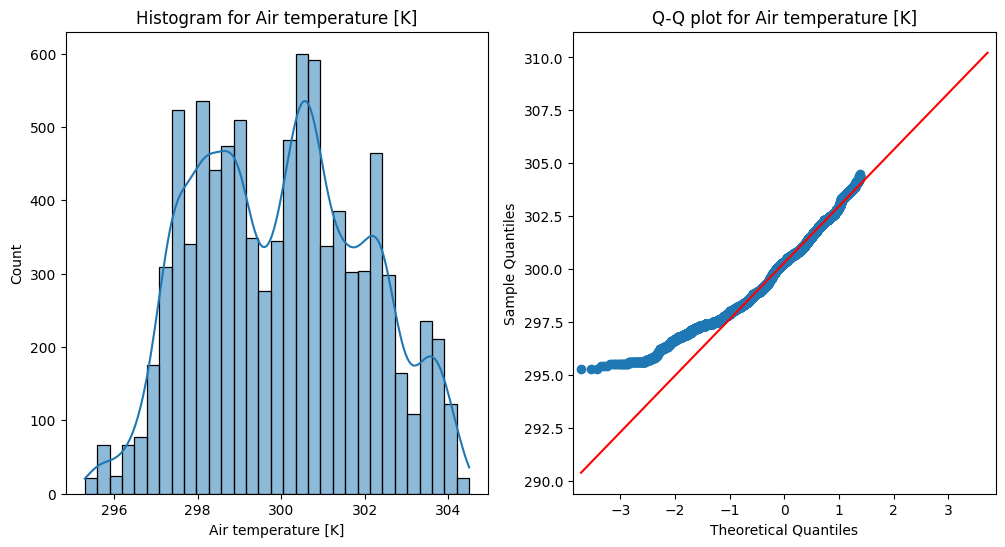

In [18]:
# Histogram & QQ plot for `Air Temperature [K]`
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

plott = Plotter(failure_data_df)
plott.histplot('Air temperature [K]', kde = True, ax = axes[0])
plott.plot_qq('Air temperature [K]', ax=axes[1])

# Display the plots
plt.show()

- Histogram shows a slight negative skew, with a peak to the right of half of the data.
- QQ plot shows deviations from the lower bounds of the `Air temperature [K]`.


In [19]:
info = DataFrameInfo(failure_data_df)
info.normal_test('Air temperature [K]')

Statistics=928.181, p=0.000


The normality test for `Air temperature [K]` 
- p-value < 0.05
- data is symmetrical and follows a normal distribution 

Therefore impute NULL values using the median. The median is chosen as there is a slight visibly negative skew from the histogram. 
- If the histogram was also symmetrical then we would have chosen the mean to impute.


In [20]:
# # Impute NULL values of Air temperature 
# dt = DataTransform(failure_data)
# failure_data['Air temperature [K]'] = dt.impute_column(column_name='Air temperature [K]', method='median')

In [21]:
# Impute NULL values of Air temperature 
dt = DataTransform(failure_data_df)
imputation_dict = {'Air temperature [K]': 'median'}
failure_data_df= dt.impute_missing_values(imputation_dict)


Executing: Imputing Missing Values
Number of NULL values in Air temperature [K] before imputation: 838
Number of NULL values in Air temperature [K] after imputation: 0
Completed: Imputation of Missing Values


#### Process temperature [K]: imputing missing values 

In [22]:
# # Histogram & QQ plot for `Process temperature`

# # Create a figure with two subplots side by side
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# plott = Plotter(failure_data)
# plott.histplot('Process temperature [K]', kde = True, ax = axes[0])
# plott.plot_qq('Process temperature [K]', ax=axes[1])

# # Display the plots
# plt.show()

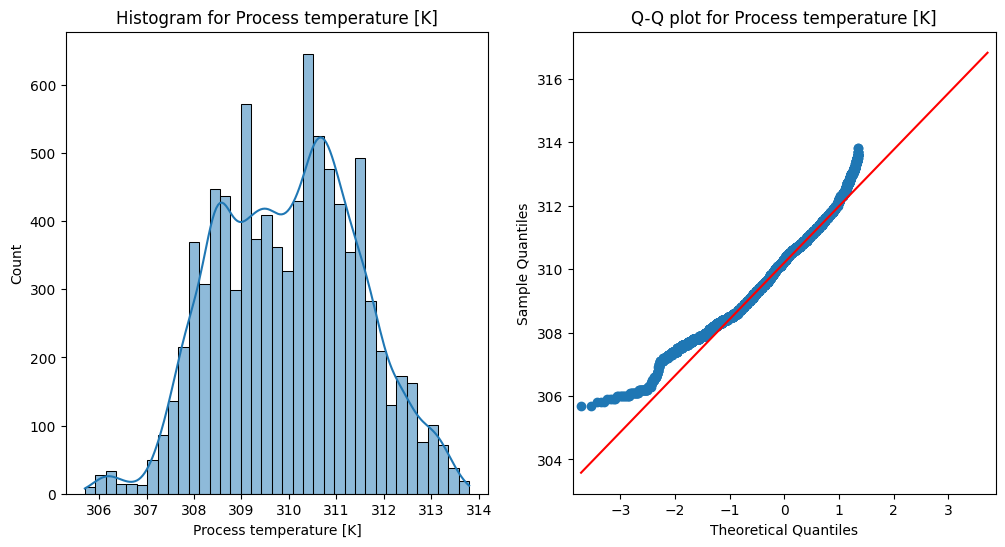

In [23]:
# Histogram & QQ plot for `Process temperature`

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

plott = Plotter(failure_data_df)
plott.histplot('Process temperature [K]', kde = True, ax = axes[0])
plott.plot_qq('Process temperature [K]', ax=axes[1])

# Display the plots
plt.show()

- Histogram shows a normal distibution, with a peak around 310.9 K 
- Q-Q plot shows significant deviation in the lower bound of the data
- See if the normal test matches the behaviour observed in the Histogram


In [24]:
info = DataFrameInfo(failure_data_df)
info.normal_test('Process temperature [K]')

Statistics=181.218, p=0.000


- normal test has shown a p-value < 0.05, which means we can reject the null hypothesis. 
- `Process temperature [K]` is normally distributed, the data is symmetric

conclusion:
- impute using the mean of the data.

In [25]:
# # Impute NULL values of `Process temperature [K]` using the median
# dt = DataTransform(failure_data_df)
# failure_data['Process temperature [K]'] = dt.impute_column(column_name='Process temperature [K]', method='mean')

In [26]:
# Impute NULL values of `Process temperature [K]` using the median
dt = DataTransform(failure_data_df)
imputation_dict = {'Process temperature [K]': 'mean'}
failure_data_df= dt.impute_missing_values(imputation_dict)


Executing: Imputing Missing Values
Number of NULL values in Process temperature [K] before imputation: 881
Number of NULL values in Process temperature [K] after imputation: 0
Completed: Imputation of Missing Values


#### Tool wear [min]: imputing missing values 

In [27]:
# # Histogram & QQ plot for `Process temperature`

# # Create a figure with two subplots side by side
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# plott = Plotter(failure_data_df)
# plott.histplot('Tool wear [min]', kde = True, ax = axes[0])
# plott.plot_qq('Tool wear [min]', ax=axes[1])

# # Display the plots
# plt.show()

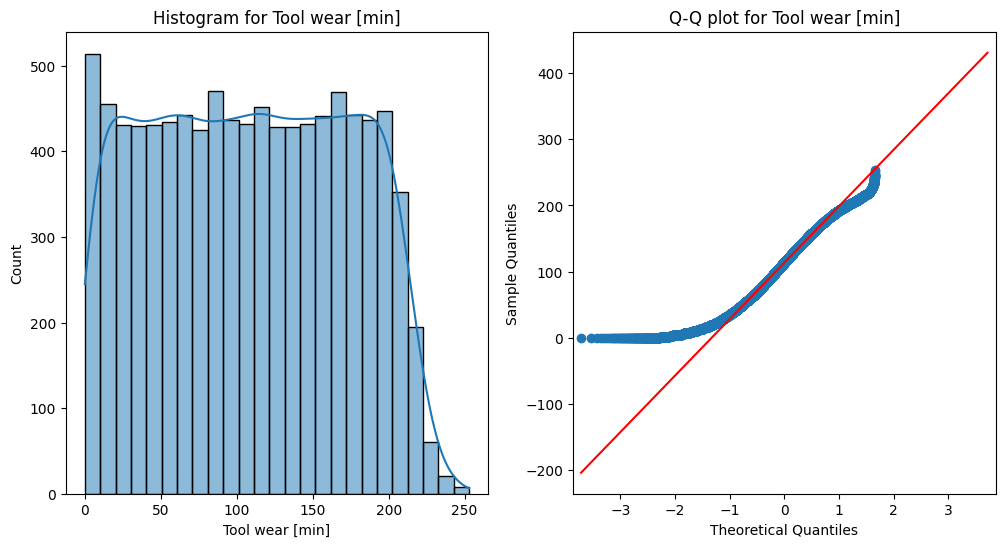

In [28]:
# Histogram & QQ plot for `Process temperature`

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

plott = Plotter(failure_data_df)
plott.histplot('Tool wear [min]', kde = True, ax = axes[0])
plott.plot_qq('Tool wear [min]', ax=axes[1])

# Display the plots
plt.show()

Histogram:
- Positively skewed.
- The Histogram shows consistent spikers throughout the data , these spikes may be due to the 'High" quality tool type lasting longer than the other types.

Q-Q plot 
- significant deviations in the lower quartile. 
- The middle and upper quartile seem to show tendency towards being normally distributed, however, this is rather misleading after viewing the histogram

See if the normal test supports the above 

In [29]:
info = DataFrameInfo(failure_data_df)
info.normal_test('Tool wear [min]')

Statistics=6306.896, p=0.000


Normal Test
- The p-value of the normal test is showing 0, however we know visually that this is not the case from the Histogram of `Tool wear [min]`

#### Imputing method 
- impute using the median of the data. The median was chosen over the mean given the postive skew observed in the histogram. 
- The outliers present for `Tool wear [min]` > 200 are likely to skew the mean, there for median is a more robust method.


In [30]:
# Impute NULL values of `Tool wear [min]` using the median 
dt = DataTransform(failure_data_df)
imputation_dict = {'Tool wear [min]': 'median'}
failure_data_df= dt.impute_missing_values(imputation_dict)


Executing: Imputing Missing Values
Number of NULL values in Tool wear [min] before imputation: 484
Number of NULL values in Tool wear [min] after imputation: 0
Completed: Imputation of Missing Values


In [31]:
# Prove that the new transformed data contails no missing values 
info_df_without_null = DataFrameInfo(failure_data_df)
info_df_without_null.percentage_of_null()

UDI                        0.0
Type                       0.0
Air temperature [K]        0.0
Process temperature [K]    0.0
Rotational speed [rpm]     0.0
Torque [Nm]                0.0
Tool wear [min]            0.0
Machine failure            0.0
TWF                        0.0
HDF                        0.0
PWF                        0.0
OSF                        0.0
RNF                        0.0
H                          0.0
L                          0.0
M                          0.0
dtype: float64

In [32]:
# Checkpoint: All the Data Transform steps we have made so far

print('##############################################################################')
print('Step 0: Load the Data')
load_data = LoadData('failure_data.csv')  # Instantiate the class with your file name
failure_data_df = load_data.df  # Access the loaded DataFrame
print('##############################################################################')
print('Step 1: Initial Data Cleaning')
dt = DataTransform(failure_data_df)
failure_data_df = dt.drop_column(['Unnamed: 0', 'Product ID'])

dt = DataTransform(failure_data_df)
type_dummy_df = dt.create_dummies_from_column('Type')
failure_data_df = dt.concat_dataframes(type_dummy_df)

info = DataFrameInfo(failure_data_df)
print(f"\nColumns After concatination: \n{info.column_names()}")
print('##############################################################################')
print('Step 2: Impute missing values')
imputation_dict = {
    'Air temperature [K]': 'median',
    'Process temperature [K]': 'mean',
    'Tool wear [min]': 'median'
}
dt = DataTransform(failure_data_df)
failure_data_df = dt.impute_missing_values(imputation_dict)
info = DataFrameInfo(failure_data_df)
print(f"\nCheck\nPercentage of Null Values for each column after imputation: \n{info.percentage_of_null()}")

##############################################################################
Step 0: Load the Data
File found: /Users/manishkhurmi/Desktop/EDA_project/failure_data.csv
DataFrame loaded successfully from /Users/manishkhurmi/Desktop/EDA_project/failure_data.csv.
##############################################################################
Step 1: Initial Data Cleaning
Column List: 
 Index(['Unnamed: 0', 'UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

Column List After dropping df
: Index(['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

Columns After concatination: 
Index(['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K

## 3) Investigating for Skewness in the data 
<a id="skew"></a>

In [33]:
# failure_data_without_null = pd.read_csv('failure_data_step_2_removed_null.csv')

#### Interpreting the skew() values

- -0.5 < skew_value < 0.5, the data are fairly symmetrical
- If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
- If the skewness is less than -1 or greater than 1, the data are highly skewed


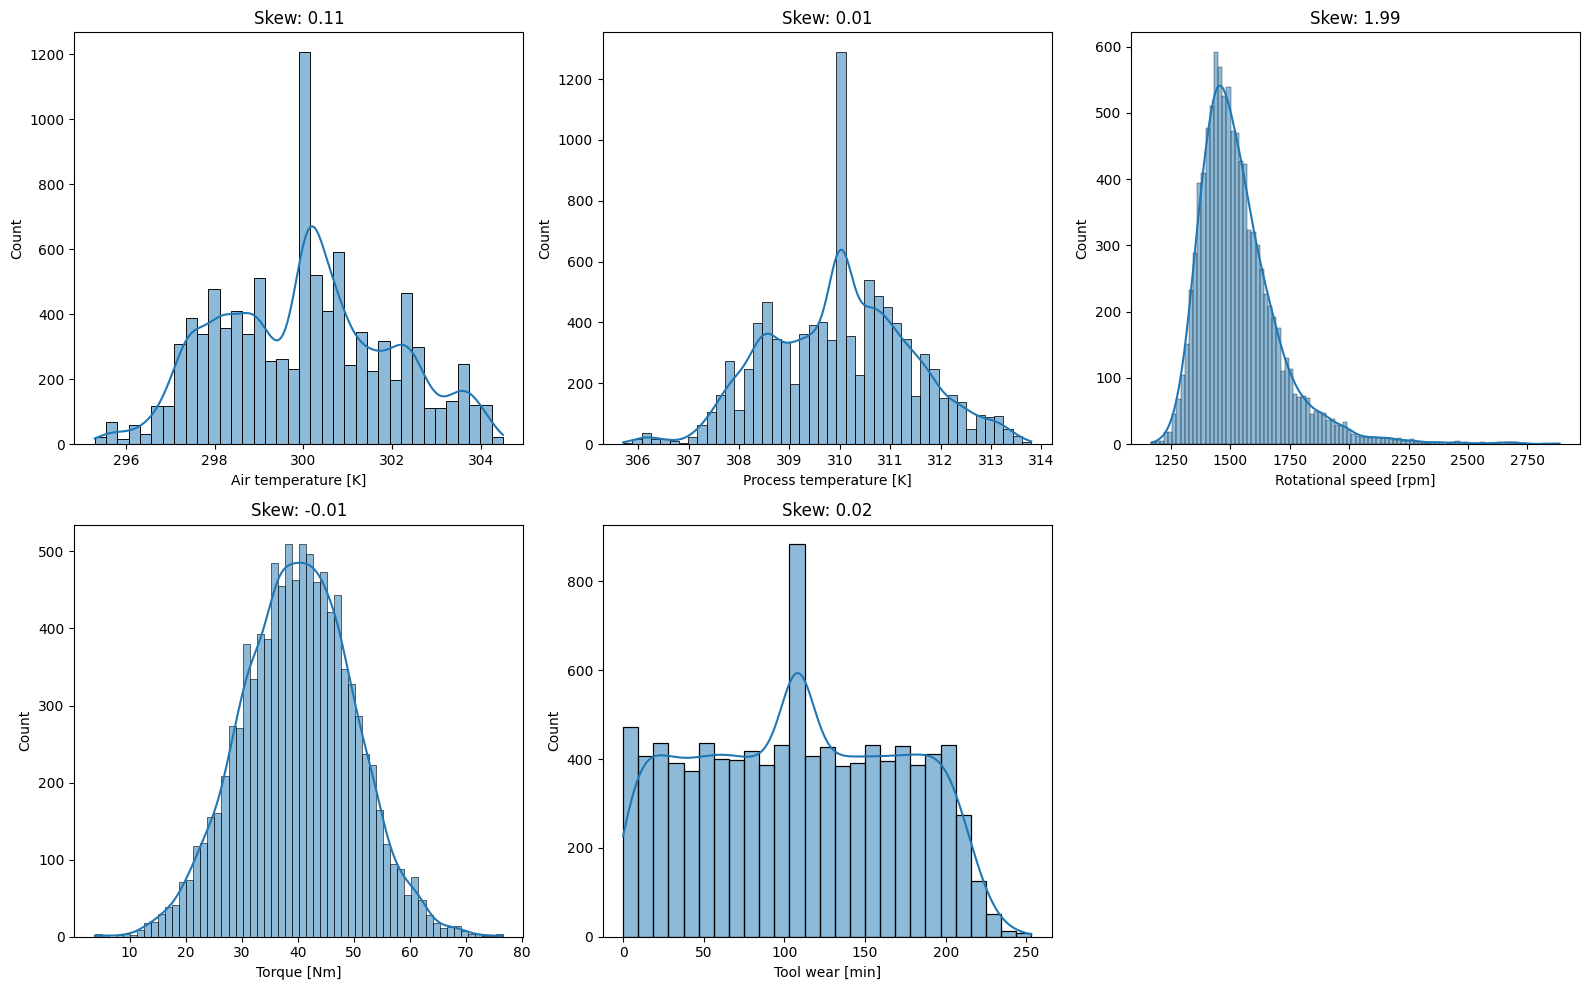

In [34]:
# Initialize the DataInfo class
info = DataFrameInfo(failure_data_df)

# Initialize the Plotter class with the DataFrame and DataInfo object
plott = Plotter(failure_data_df)

# Define continuous variables
continuous_variables = [
    'Air temperature [K]', 
    'Process temperature [K]',
    'Rotational speed [rpm]', 
    'Torque [Nm]', 
    'Tool wear [min]'
]

# Call the method to plot continuous variables
plott.histogram_and_skew_sub_plots(variable_list=continuous_variables, num_cols=3)


Histogram & Skewness Test
- `Rotational speed [rpm]` has a strong positive skew as the skew_value > 1. 
- All other continous data have fairly symmetric data. Treating for skewness will not be considered, as the loss of interpretability outways the gain of symmetry for the model.

In [35]:
print('Step 3: Treating Skewness')
dt = DataTransform(failure_data_df)
info = DataFrameInfo(failure_data_df)
print(f"\nSkew Test Before treatement: {info.skew_test('Rotational speed [rpm]')}")
failure_data_df = dt.treat_skewness(column_name='Rotational speed [rpm]', normalied_column_name='rotational_speed_normalised', method='yeojohnson') # 
info = DataFrameInfo(failure_data_df)
print(f"\nSkew Test After treatement: {info.skew_test('rotational_speed_normalised')}")

Step 3: Treating Skewness

Skew Test Before treatement: 1.993171004713752
Applying Yeo-Johnson transform to Rotational speed [rpm]
yeojohnson applied to Rotational speed [rpm].

Skew Test After treatement: 0.0


Histograms of `Rotational Speed [rpm]` Before vs After Treating for Skewness


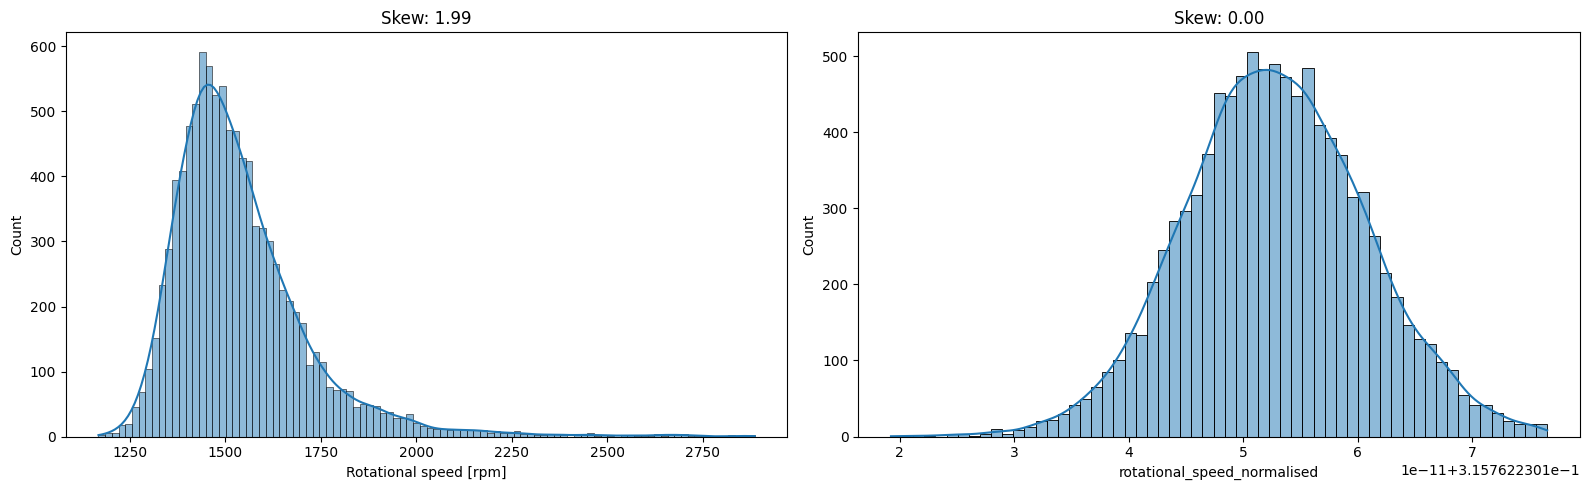

In [36]:
# Compare Histograms of `Rotational Speed [rpm]` Before vs After Treating for Skewness
info = DataFrameInfo(failure_data_df)
dt = DataTransform(failure_data_df)
plott = Plotter(failure_data_df)

# plott.histplot('rotational_speed_normalised')
print('Histograms of `Rotational Speed [rpm]` Before vs After Treating for Skewness')
plott.histogram_and_skew_sub_plots(variable_list=['Rotational speed [rpm]', 'rotational_speed_normalised'], num_cols = 2)

- yeojohnson data transform has for `Rotational speed [rpm]` has been successful. 
- The skew_value is 0, indicating the data is symmetrical after the transformation

## 4) Removing Outliers from the Data 
<a id="outliers"></a>

In [37]:
# Apply steps up to and including treating for skewness 
    # Step 3: Treating for skewness in `Rotational Speed [rpm]`

print('##############################################################################')
print('Step 0: Load the Data')
load_data = LoadData('failure_data.csv')  # Instantiate the class with your file name
failure_data_df = load_data.df  # Access the loaded DataFrame
print('##############################################################################')
print('Step 1: Initial Data Cleaning')
dt = DataTransform(failure_data_df)
failure_data_df = dt.drop_column(['Unnamed: 0', 'Product ID'])

dt = DataTransform(failure_data_df)
type_dummy_df = dt.create_dummies_from_column('Type')
failure_data_df = dt.concat_dataframes(type_dummy_df)

info = DataFrameInfo(failure_data_df)
print(f"\nColumns After concatination: \n{info.column_names()}")
print('##############################################################################')
print('Step 2: Impute missing values')
imputation_dict = {
    'Air temperature [K]': 'median',
    'Process temperature [K]': 'mean',
    'Tool wear [min]': 'median'
}
dt = DataTransform(failure_data_df)
failure_data_df = dt.impute_missing_values(imputation_dict)
info = DataFrameInfo(failure_data_df)
print(f"\nCheck\nPercentage of Null Values for each column after imputation: \n{info.percentage_of_null()}")
print('##############################################################################')
print('Step 3: Treating Skewness')
dt = DataTransform(failure_data_df)
info = DataFrameInfo(failure_data_df)
print(f"\nSkew Test Before treatement: {info.skew_test('Rotational speed [rpm]')}")
failure_data_df = dt.treat_skewness(column_name='Rotational speed [rpm]', normalied_column_name='rotational_speed_normalised', method='yeojohnson') # 
info = DataFrameInfo(failure_data_df)
print(f"\nSkew Test After treatement: {info.skew_test('rotational_speed_normalised')}")

##############################################################################
Step 0: Load the Data
File found: /Users/manishkhurmi/Desktop/EDA_project/failure_data.csv
DataFrame loaded successfully from /Users/manishkhurmi/Desktop/EDA_project/failure_data.csv.
##############################################################################
Step 1: Initial Data Cleaning
Column List: 
 Index(['Unnamed: 0', 'UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

Column List After dropping df
: Index(['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

Columns After concatination: 
Index(['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K

In [38]:
failure_data_df.head(3)

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M,rotational_speed_normalised
0,3416,L,301.4,310.4,1579,36.9,133.0,0,0,0,0,0,0,0,1,0,0.315762
1,7130,L,300.6,310.0,1635,31.0,107.0,0,0,0,0,0,0,0,1,0,0.315762
2,2320,M,299.2,308.8,1700,33.5,185.0,0,0,0,0,0,0,0,0,1,0.315762


#### What to include in the forefront:
- grid of boxplot of all continous variables
- z-score visual of the histogram, thresholds 2 & 3 with the % of the data that is being taken out as outliers. colour the outliers on the Histogram 
    - Threshold 2 vs Threshold 3. My choice also depends on the amount of data loss.

Other thoughts:
- Z-Score > IQR
    - Z-score filitering for all continous variables apart from `Rotational speed`, here we will use IQR.
    - Filtering outliers via Z-score is the chosen methodology since our continous varibles are normally distributed (see section 3 skew tests for supporting evidience). we will filter via Z-Score. 
    - Depending on the data wither a Z-score Threshold of 2 or 3 is used.
- Grid of boxplots of each continous variable

In [39]:
failure_data_df.columns

Index(['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'H', 'L', 'M',
       'rotational_speed_normalised'],
      dtype='object')

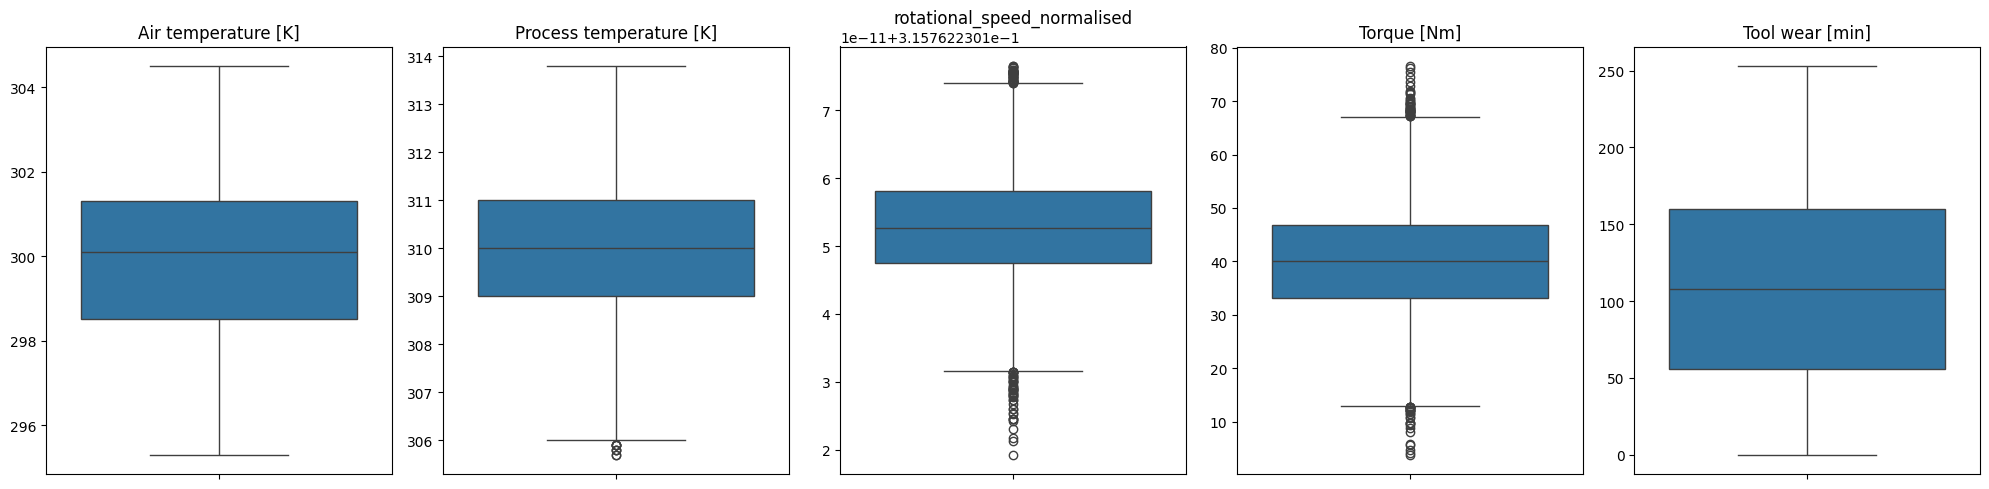

In [40]:
plott = Plotter(failure_data_df)

# List of continuous variables of interest
continous_variables = ['Air temperature [K]', 'Process temperature [K]', 'rotational_speed_normalised', 'Torque [Nm]', 'Tool wear [min]' ]
plott.boxplots(variable_list=continous_variables)

- The Boxplots of `Process temperature [K]`, `Rotational speed [rpm]`, `Torque [Nm]` have outliers and will be investigated further. 
- The Boxplots of `Air temperatures [K]` & `Tool wear [min]` have no outliers in the lower or upper bounds of their data, shown by the absense of observations in the boxplots' whiskers. 

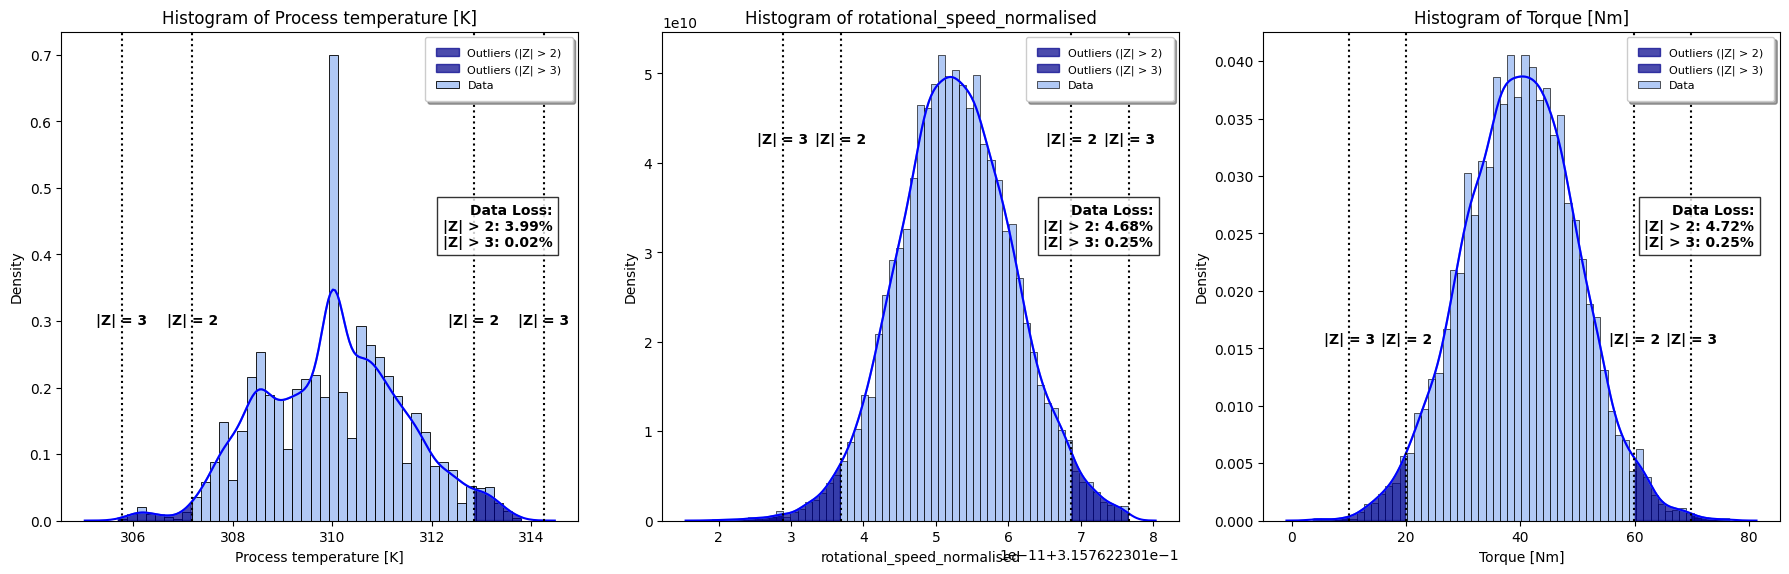

In [41]:
# Create Histograms with Z-score bounds 

plott = Plotter(failure_data_df)
plott.histograms_with_z_score_bounds(vars_list=['Process temperature [K]', 'rotational_speed_normalised', 'Torque [Nm]'])

#### Choosing between a Z-Score Threshold of 2 and 3 
- Given that we dealing with failure data in the manufacturing process, the conseqences of missing a potential failure can be severe. 
- Therefore, consider the more sensitive approach of a threshold of 2.

Pros: more sensitive to deteching smaller anomalies which might be early indicators of potential failures

Cons: Higher number of false positives, meaning more frequent alerts and possibly unnecessary inspections or interventions

Suggested approach (Post implementation):
- Begin with a z-score of 2 i.e. beginning more conservative and increasing based on future data.
- Monitor & Adjust: monitor the alerts and evaluate the relevance of outliers.

# Next Steps:
- Begin with the conservative approach of `|z| > 2`. 
- Make a note here to come back and change z_scores if the model is leading to a loss of productivity for being too conservative.
- ***Strategic EDA decision***: adjust |z| scores.

In [42]:
failure_data_df.columns

Index(['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'H', 'L', 'M',
       'rotational_speed_normalised'],
      dtype='object')

### Box Plots: Before and After Removing Outliers 

In [43]:
# Rename our Data Frame to reflect the before vs after affects of removing outliers
before_removing_outliers_df = failure_data_df

In [44]:
# Remove Outliers 
print('Step 4: Removing Outliers')
outlier_columns = ['rotational_speed_normalised', 'Torque [Nm]', 'Process temperature [K]']
dt = DataTransform(before_removing_outliers_df)
after_removing_outliers_df, _, _ = dt.remove_outliers_with_optimiser(outlier_columns, key_ID='UDI', method='IQR', suppress_output=True)

Step 4: Removing Outliers
Testing combination: ['rotational_speed_normalised', 'Torque [Nm]', 'Process temperature [K]']
Testing combination: ['rotational_speed_normalised', 'Process temperature [K]', 'Torque [Nm]']
Testing combination: ['Torque [Nm]', 'rotational_speed_normalised', 'Process temperature [K]']
Testing combination: ['Torque [Nm]', 'Process temperature [K]', 'rotational_speed_normalised']
Testing combination: ['Process temperature [K]', 'rotational_speed_normalised', 'Torque [Nm]']
Testing combination: ['Process temperature [K]', 'Torque [Nm]', 'rotational_speed_normalised']

Results:
                                         combinations  percentage_data_loss
0  (rotational_speed_normalised, Torque [Nm], Pro...                  1.34
1  (rotational_speed_normalised, Process temperat...                  1.34
2  (Torque [Nm], rotational_speed_normalised, Pro...                  1.41
3  (Torque [Nm], Process temperature [K], rotatio...                  1.41
4  (Process temper

Boxplots Orginal Data:


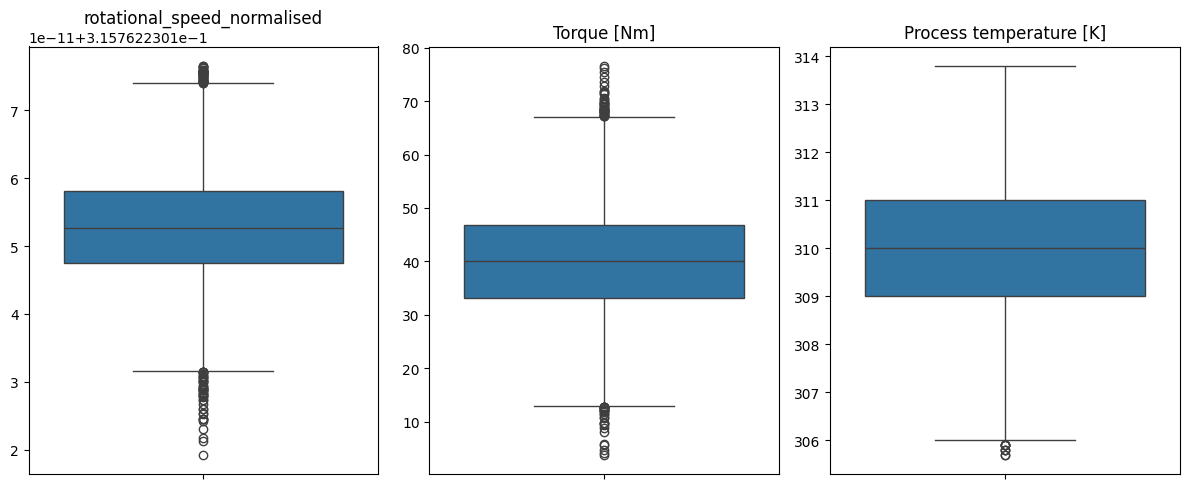

Boxplots After removing Outliers:


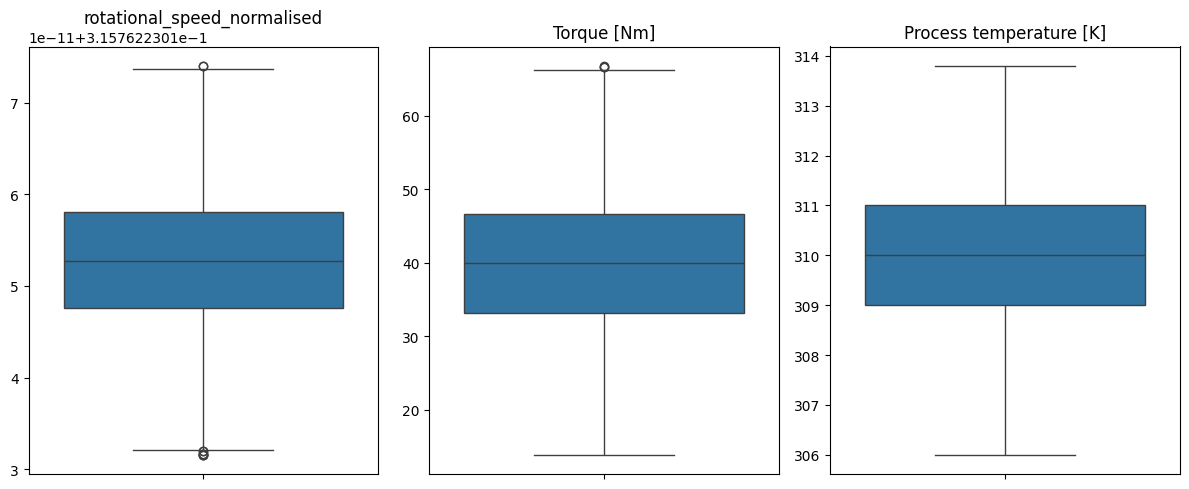


Before Removing outliers:        rotational_speed_normalised   Torque [Nm]  Process temperature [K]
count                 1.000000e+04  10000.000000             10000.000000
mean                  3.157622e-01     39.986910               310.011580
std                   7.970412e-12      9.968934                 1.413428
min                   3.157622e-01      3.800000               305.700000
25%                   3.157622e-01     33.200000               309.000000
50%                   3.157622e-01     40.100000               310.011580
75%                   3.157622e-01     46.800000               311.000000
max                   3.157622e-01     76.600000               313.800000

Before Removing outliers:        rotational_speed_normalised  Torque [Nm]  Process temperature [K]
count                 9.866000e+03  9866.000000              9866.000000
mean                  3.157622e-01    39.908058               310.015316
std                   7.632051e-12     9.570053              

In [45]:
# Comparing Before vs After via Boxplots 

# Initialise Classes: Plotter & DataFrameInfo
plott_before_removing_outliers = Plotter(before_removing_outliers_df)
plott_after_removing_outliers = Plotter(after_removing_outliers_df)

info_before_removing_outliers = DataFrameInfo(before_removing_outliers_df)
info_after_removing_outliers = DataFrameInfo(after_removing_outliers_df)

# Plots & Info Comparison 
print('Boxplots Orginal Data:')
plott_before_removing_outliers.boxplots(outlier_columns)
print('Boxplots After removing Outliers:')
plott_after_removing_outliers.boxplots(outlier_columns)
print(f"\nBefore Removing outliers: {info_before_removing_outliers.describe_statistics(outlier_columns)}")
print(f"\nBefore Removing outliers: {info_after_removing_outliers.describe_statistics(outlier_columns)}")

In [46]:
# Rename the DataFrame 
failure_data_df = after_removing_outliers_df

# 5) Investigating for Collinearity (Dropping overly correlated columns)
<a id="collinearity"></a>

In [47]:
# All steps up to 5
print('##############################################################################')
print('Step 0: Load the Data')
load_data = LoadData('failure_data.csv')  # Instantiate the class with your file name
failure_data_df = load_data.df  # Access the loaded DataFrame
print('##############################################################################')
print('Step 1: Initial Data Cleaning')
dt = DataTransform(failure_data_df)
failure_data_df = dt.drop_column(['Unnamed: 0', 'Product ID'])

dt = DataTransform(failure_data_df)
type_dummy_df = dt.create_dummies_from_column('Type')
failure_data_df = dt.concat_dataframes(type_dummy_df)

info = DataFrameInfo(failure_data_df)
print(f"\nColumns After concatination: \n{info.column_names()}")
print('##############################################################################')
print('Step 2: Impute missing values')
imputation_dict = {
    'Air temperature [K]': 'median',
    'Process temperature [K]': 'mean',
    'Tool wear [min]': 'median'
}
dt = DataTransform(failure_data_df)
failure_data_df = dt.impute_missing_values(imputation_dict)
info = DataFrameInfo(failure_data_df)
print(f"\nCheck\nPercentage of Null Values for each column after imputation: \n{info.percentage_of_null()}")
print('##############################################################################')
print('Step 3: Treating Skewness')
dt = DataTransform(failure_data_df)
info = DataFrameInfo(failure_data_df)
print(f"\nSkew Test Before treatement: {info.skew_test('Rotational speed [rpm]')}")
failure_data_df = dt.treat_skewness(column_name='Rotational speed [rpm]', normalied_column_name='rotational_speed_normalised', method='yeojohnson') # 
info = DataFrameInfo(failure_data_df)
print(f"\nSkew Test After treatement: {info.skew_test('rotational_speed_normalised')}")
print('##############################################################################')
print('Step 4: Removing Outliers')
dt = DataTransform(failure_data_df)

info = DataFrameInfo(failure_data_df)
outlier_columns = ['rotational_speed_normalised', 'Torque [Nm]', 'Process temperature [K]']
print(f"\nBefore Removing outliers: {info.describe_statistics(outlier_columns)}")

failure_data_df, _, _ = dt.remove_outliers_with_optimiser(outlier_columns, key_ID='UDI', method='IQR', suppress_output=True)

info = DataFrameInfo(failure_data_df)
print(f"\nAfter Removing outliers: {info.describe_statistics(outlier_columns)}")

##############################################################################
Step 0: Load the Data
File found: /Users/manishkhurmi/Desktop/EDA_project/failure_data.csv
DataFrame loaded successfully from /Users/manishkhurmi/Desktop/EDA_project/failure_data.csv.
##############################################################################
Step 1: Initial Data Cleaning
Column List: 
 Index(['Unnamed: 0', 'UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

Column List After dropping df
: Index(['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

Columns After concatination: 
Index(['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K

Summary:

- correlation heatmap 
- filter for abs(correlations) > 0.75 (strong correlations only)
- OLS model & vifs
- chi-squared tests
- logit model 

In [48]:
dt = DataTransform(failure_data_df)
failure_data_df = dt.drop_column(vars=['UDI', 'Type'])

Column List: 
 Index(['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'H', 'L', 'M',
       'rotational_speed_normalised'],
      dtype='object')

Column List After dropping df
: Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'H', 'L', 'M',
       'rotational_speed_normalised'],
      dtype='object')


Correlation Heatmap

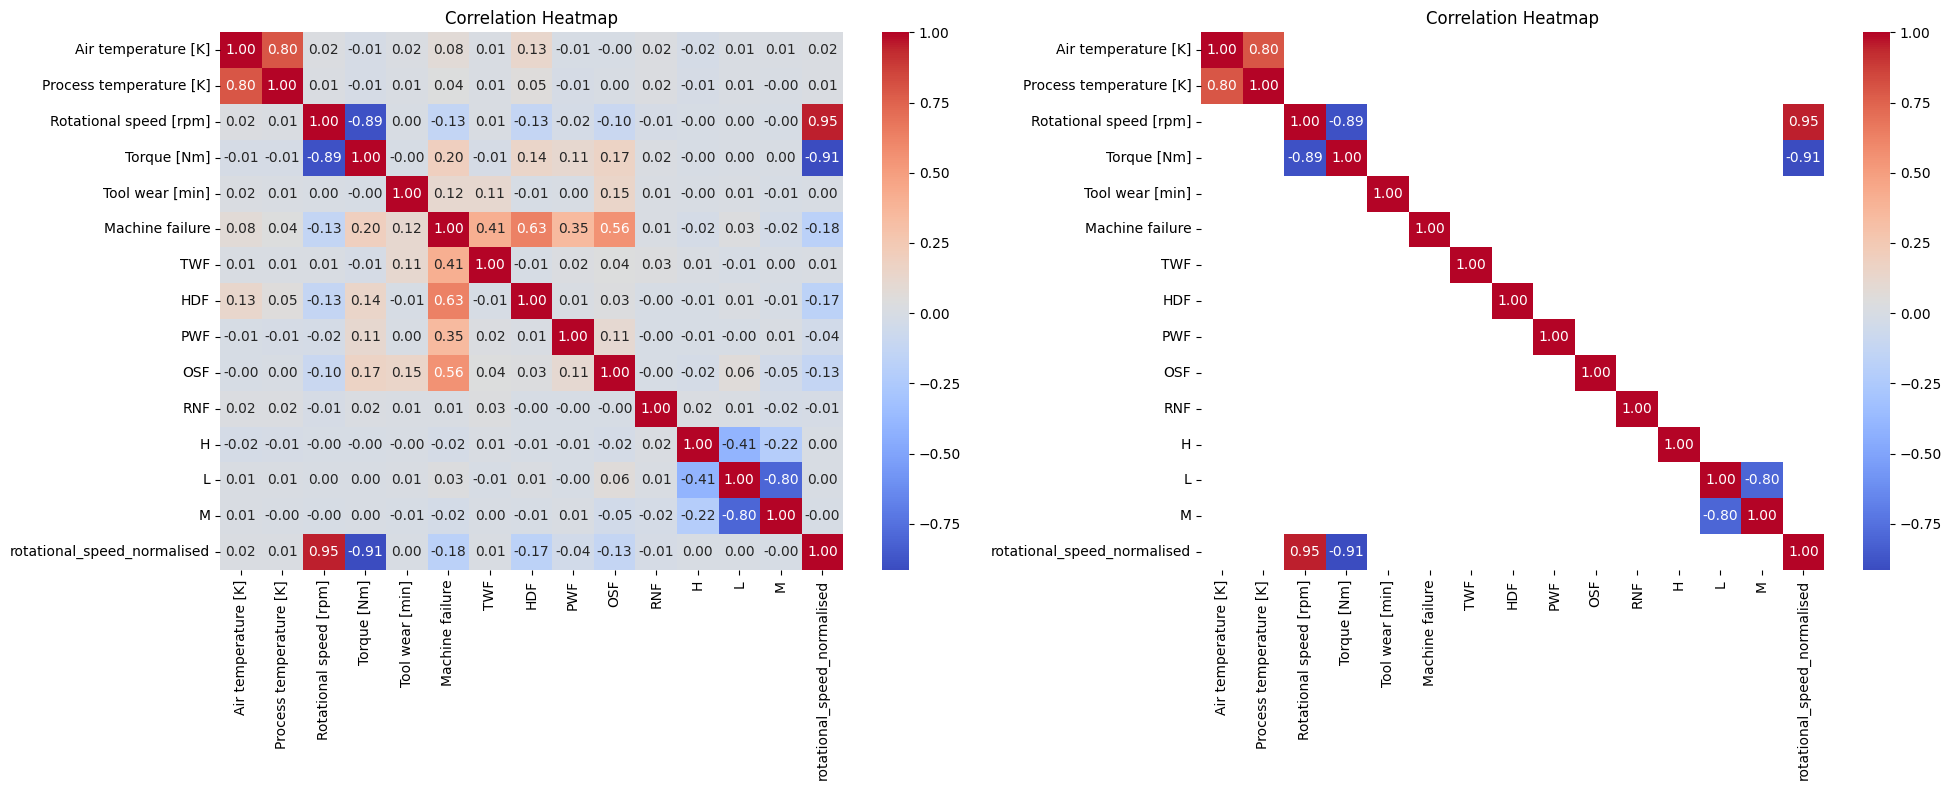

In [49]:
# Initialize the Plotter with DataFrame
plott = Plotter(failure_data_df)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the first heatmap on the left subplot (no threshold)
plott.correlation_heatmap(figsize=(10, 8), ax=axes[0])

# Plot the second heatmap with a threshold on the right subplot
plott.correlation_heatmap(threshold=0.75, figsize=(10, 8), ax=axes[1])

# # Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [50]:
# # Pairs that maybe correlated 
# print('Variables that are strongly correlated:\n')
# print(failure_data_df[['Air temperature [K]', 'Process temperature [K]']].head())
# print(failure_data_df[['Torque [Nm]', 'Rotational speed [rpm]']].head())
# print(failure_data_df[['L', 'M']].head())

# OLS Model & VIFs

In [51]:
# Rename columns for the OLS model package (no spaces allowed)
dt = DataTransform(failure_data_df)
machine_failure_col_mapping = {
    'Machine failure': 'machine_failure',
    'Air temperature [K]': 'air_temperature',
    'Process temperature [K]': 'process_temperature',
    'Rotational speed [rpm]': 'rotational_speed_actual',
    'Torque [Nm]': 'torque',
    'Tool wear [min]': 'tool_wear'
}

# rename df 
failure_data_df = dt.rename_colunms(machine_failure_col_mapping)

# Save DataFrame
# failure_data_step_5_collinearity.to_csv('failure_data_step_5_collinearity.csv')

# print df 
failure_data_df.head(2)

Before renaming: ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'H', 'L', 'M', 'rotational_speed_normalised']

After renaming: ['air_temperature', 'process_temperature', 'rotational_speed_actual', 'torque', 'tool_wear', 'machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'H', 'L', 'M', 'rotational_speed_normalised']



,air_temperature,process_temperature,rotational_speed_actual,torque,tool_wear,machine_failure,TWF,HDF,PWF,OSF,RNF,H,L,M,rotational_speed_normalised
0,301.4,310.4,1579,36.9,133.0,0,0,0,0,0,0,0,1,0,0.315762
1,300.6,310.0,1635,31.0,107.0,0,0,0,0,0,0,0,1,0,0.315762


In [52]:
model = Models(failure_data_df)
model.ols(formula='machine_failure ~ air_temperature + process_temperature + rotational_speed_normalised + torque + tool_wear + TWF + HDF + PWF + OSF + RNF + H + L + M', 
          model_summary=1)

                                     Results: Ordinary least squares
Model:                           OLS                          Adj. R-squared:                 0.919      
Dependent Variable:              machine_failure              AIC:                            -32675.9443
Date:                            2024-10-14 16:10             BIC:                            -32582.3852
No. Observations:                9866                         Log-Likelihood:                 16351.     
Df Model:                        12                           F-statistic:                    9374.      
Df Residuals:                    9853                         Prob (F-statistic):             0.00       
R-squared:                       0.919                        Scale:                          0.0021310  
---------------------------------------------------------------------------------------------------------
                                 Coef.         Std.Err.       t     P>|t|       [0.

- These high `p-values` are likely down to the OLS model being a poor choice for modelling dependant variables that are binary. 


In [53]:
model = Models(failure_data_df)

# Exogenous models 
ols_machine_failure = model.ols(formula='machine_failure ~ air_temperature + process_temperature + rotational_speed_normalised + torque + tool_wear + TWF + HDF + PWF + OSF + RNF + H + L + M')
ols_exog_air_temperature = model.ols(formula='air_temperature ~ machine_failure + process_temperature + rotational_speed_normalised + torque + tool_wear + TWF + HDF + PWF + OSF + RNF + H + L + M')
ols_exog_process_temperature= model.ols(formula='process_temperature ~ machine_failure + air_temperature + rotational_speed_normalised + torque + tool_wear + TWF + HDF + PWF + OSF + RNF + H + L + M')
ols_exog_torque = model.ols(formula='torque ~ machine_failure + air_temperature + process_temperature + rotational_speed_normalised + tool_wear + TWF + HDF + PWF + OSF + RNF + H + L + M')
ols_exog_rotational_speed = model.ols(formula='rotational_speed_normalised ~ machine_failure + air_temperature + process_temperature + torque + tool_wear + TWF + HDF + PWF + OSF + RNF + H + L + M')

# r2 
print('R²:')
r2_machine_failure = model.r_squared(ols_machine_failure, model_name='machine_failure')
r2_air_temperature = model.r_squared(ols_exog_air_temperature, model_name='air_temperature')
r2_process_temperature = model.r_squared(ols_exog_process_temperature, model_name='air_temperature') 
r2_torque = model.r_squared(ols_exog_torque, model_name='torque')
r2_rotational_speed = model.r_squared(ols_exog_rotational_speed, model_name='rotational_speed' )

# VIFS 
print('\nVIF scores:')
vif_machine_failure = model.VIF(ols_machine_failure, model_name='machine_failure')
vif_air_temperature = model.VIF(ols_exog_air_temperature, model_name='air_temperature')
vif_process_temperature = model.VIF(ols_exog_process_temperature, model_name='process_temperature') 
vif_torque = model.VIF(ols_exog_torque, model_name='torque')
vif_rotational_speed = model.VIF(ols_exog_rotational_speed, model_name='rotational_speed' )    

R²:
machine_failure: 0.9194667158139089
air_temperature: 0.6429909173800379
air_temperature: 0.6374219167653644
torque: 0.8443671051169896
rotational_speed: 0.8425540186824283

VIF scores:
machine_failure: 12.417226120932373
air_temperature: 2.801049185251415
process_temperature: 2.758026605135062
torque: 6.42537685077247
rotational_speed: 6.351384720217024


- All dependant variables have a VIF < 10. Therefore no variable will be dropped.
- Note that using 'rotaional_speed_normlaised' led to higher VIFs than 'rotational_speed_actual.

In [54]:
failure_data_df.columns

Index(['air_temperature', 'process_temperature', 'rotational_speed_actual',
       'torque', 'tool_wear', 'machine_failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF', 'H', 'L', 'M', 'rotational_speed_normalised'],
      dtype='object')

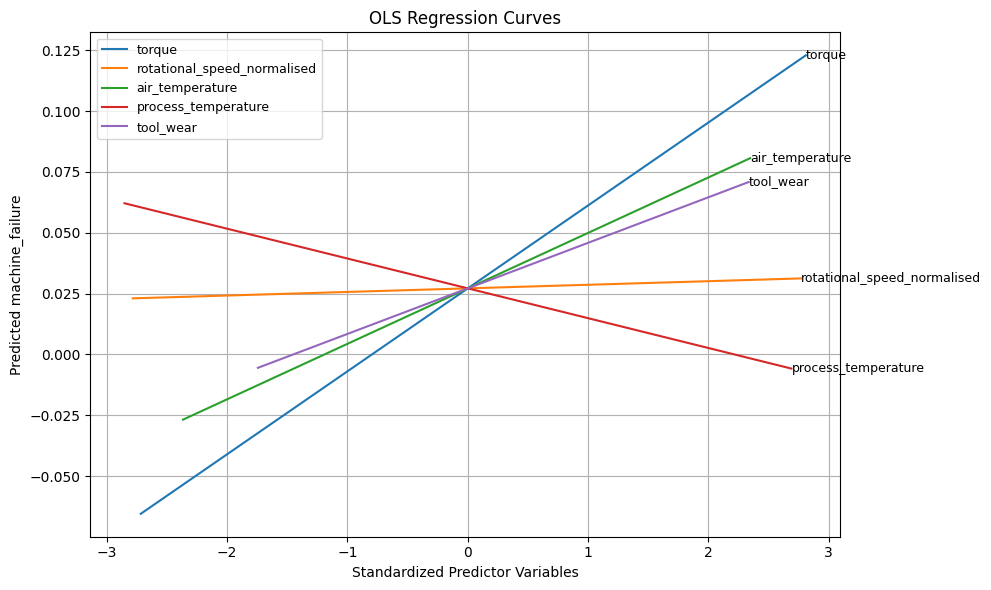

Optimization terminated successfully.
         Current function value: 0.090337
         Iterations 9


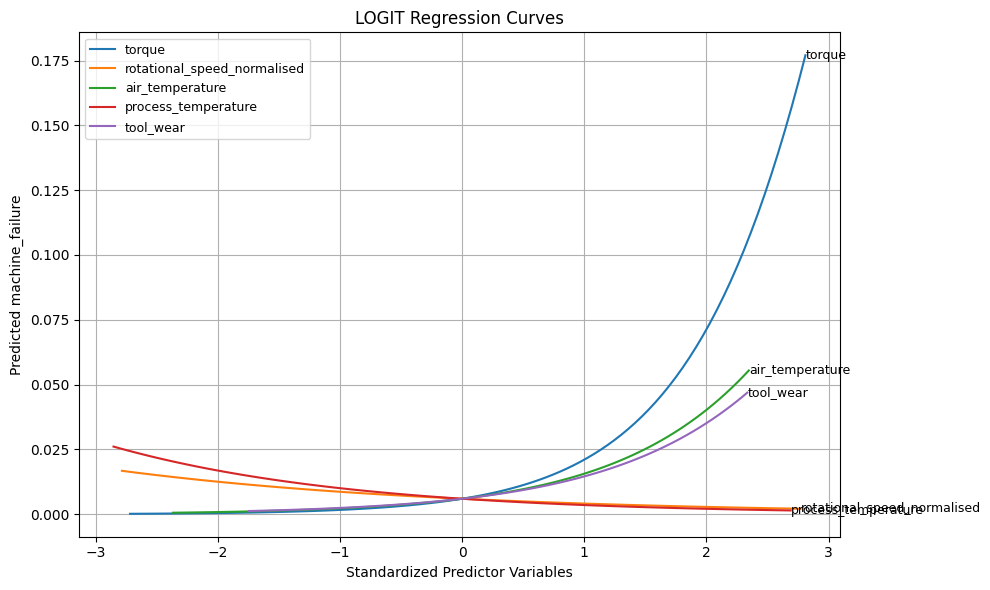

In [55]:
# Visualising OLS & Logit Model
# Initialize the Models class
model = Models(failure_data_df)

# Define the continous predictor variables
predictor_vars = ['torque', 'rotational_speed_normalised', 'air_temperature', 'process_temperature', 'tool_wear']
# # Plot OLS regression curves for each predictor variable in individual plots
# model.plot_model_curves(predictor_vars, model='ols', ncols=2)

# Plot OLS regression curves for each predictor variable in individual plots
model.plot_model_curves(predictor_vars, model='ols', combine_plots=1, standardize=True)

# compare with the Logit Model
# Plot Logit regression curves for each predictor variable in a combined plot
model.plot_model_curves(predictor_vars, model='logit', combine_plots=1, standardize=True)

# Chi-squared tests

In [56]:
failure_data_df.head(2)


,air_temperature,process_temperature,rotational_speed_actual,torque,tool_wear,machine_failure,TWF,HDF,PWF,OSF,RNF,H,L,M,rotational_speed_normalised
0,0.723325,0.273340,1579,-0.314336,0.399840,0,0,0,0,0,0,0,1,0,0.493036
1,0.304336,-0.010883,1635,-0.930874,-0.019335,0,0,0,0,0,0,0,1,0,0.813396


In [57]:
model = Models(failure_data_df)
results_df = model.chi_squared_test_df(binary_cols = ['machine_failure','TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'H', 'L', 'M'])

results_df

display('Filter for independant variables which have a statistically insignificant effect on machine_failure:')
display(results_df[(results_df['Variable 1']=='machine_failure') & (results_df['P-Value']>0.05)])

display('Chi-Squared Statistic is > 10 (criteria is based on 1 degree of freedom):')
display(results_df[(results_df['P-Value']>0.05) & (results_df['Chi-Squared Statistic']>=10)])
# tele

'Filter for independant variables which have a statistically insignificant effect on machine_failure:'

,Variable 1,Variable 2,Chi-Squared Statistic,P-Value,Degrees of Freedom
4,machine_failure,RNF,0.000000,1.000000,1
5,machine_failure,H,3.025864,0.081947,1


'Chi-Squared Statistic is > 10 (criteria is based on 1 degree of freedom):'

,Variable 1,Variable 2,Chi-Squared Statistic,P-Value,Degrees of Freedom


Decision: No columns will be dropped based on the Chi-Squared Test.
- `RNF` accounts for the random failures in the process, given the context of the information that this variable holds, it would be beneficial to keep it.
- Further support: although the p-values are not statistically significant for  `RNF` , the Chi-Squared Statistic is still relatively low. 

# Logistic Model

In [58]:
model = Models(failure_data_df)

In [59]:
logit_model_machine_failure = model.logit(formula = "machine_failure ~ air_temperature + process_temperature + rotational_speed_actual + torque + tool_wear", model_summary=1)

Optimization terminated successfully.
         Current function value: 0.090565
         Iterations 10
                             Results: Logit
Model:                Logit              Method:             MLE        
Dependent Variable:   machine_failure    Pseudo R-squared:   0.274      
Date:                 2024-10-14 16:10   AIC:                1799.0272  
No. Observations:     9866               BIC:                1842.2083  
Df Model:             5                  Log-Likelihood:     -893.51    
Df Residuals:         9860               LL-Null:            -1230.7    
Converged:            1.0000             LLR p-value:        1.7094e-143
No. Iterations:       10.0000            Scale:              1.0000     
------------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
------------------------------------------------------------------------
Intercept               -8.4467   1.8783 -4.4969 0

- The 'nan' values are likely due to the skewness transformation performed in step 4 on `rotational_speed`

Create a model based on data that has been treated for null values & outliers only.

Optimization terminated successfully.
         Current function value: 0.090337
         Iterations 9


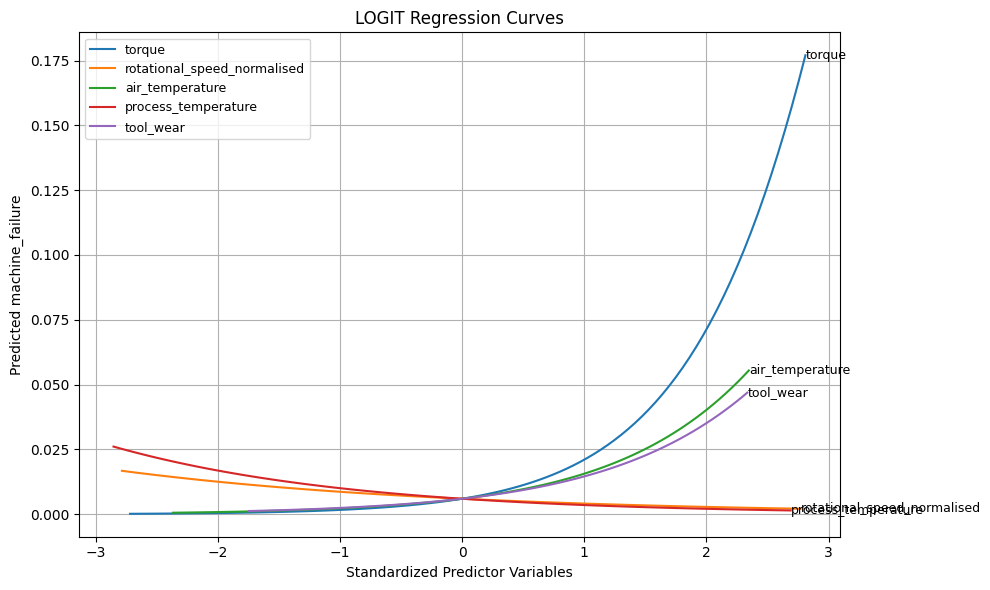

In [60]:
# Plot Logit regression curves for each predictor variable in a combined plot
model = Models(failure_data_df)
model.plot_model_curves(predictor_vars, model='logit', combine_plots=1, standardize=True)

Optimization terminated successfully.
         Current function value: 0.090565
         Iterations 10


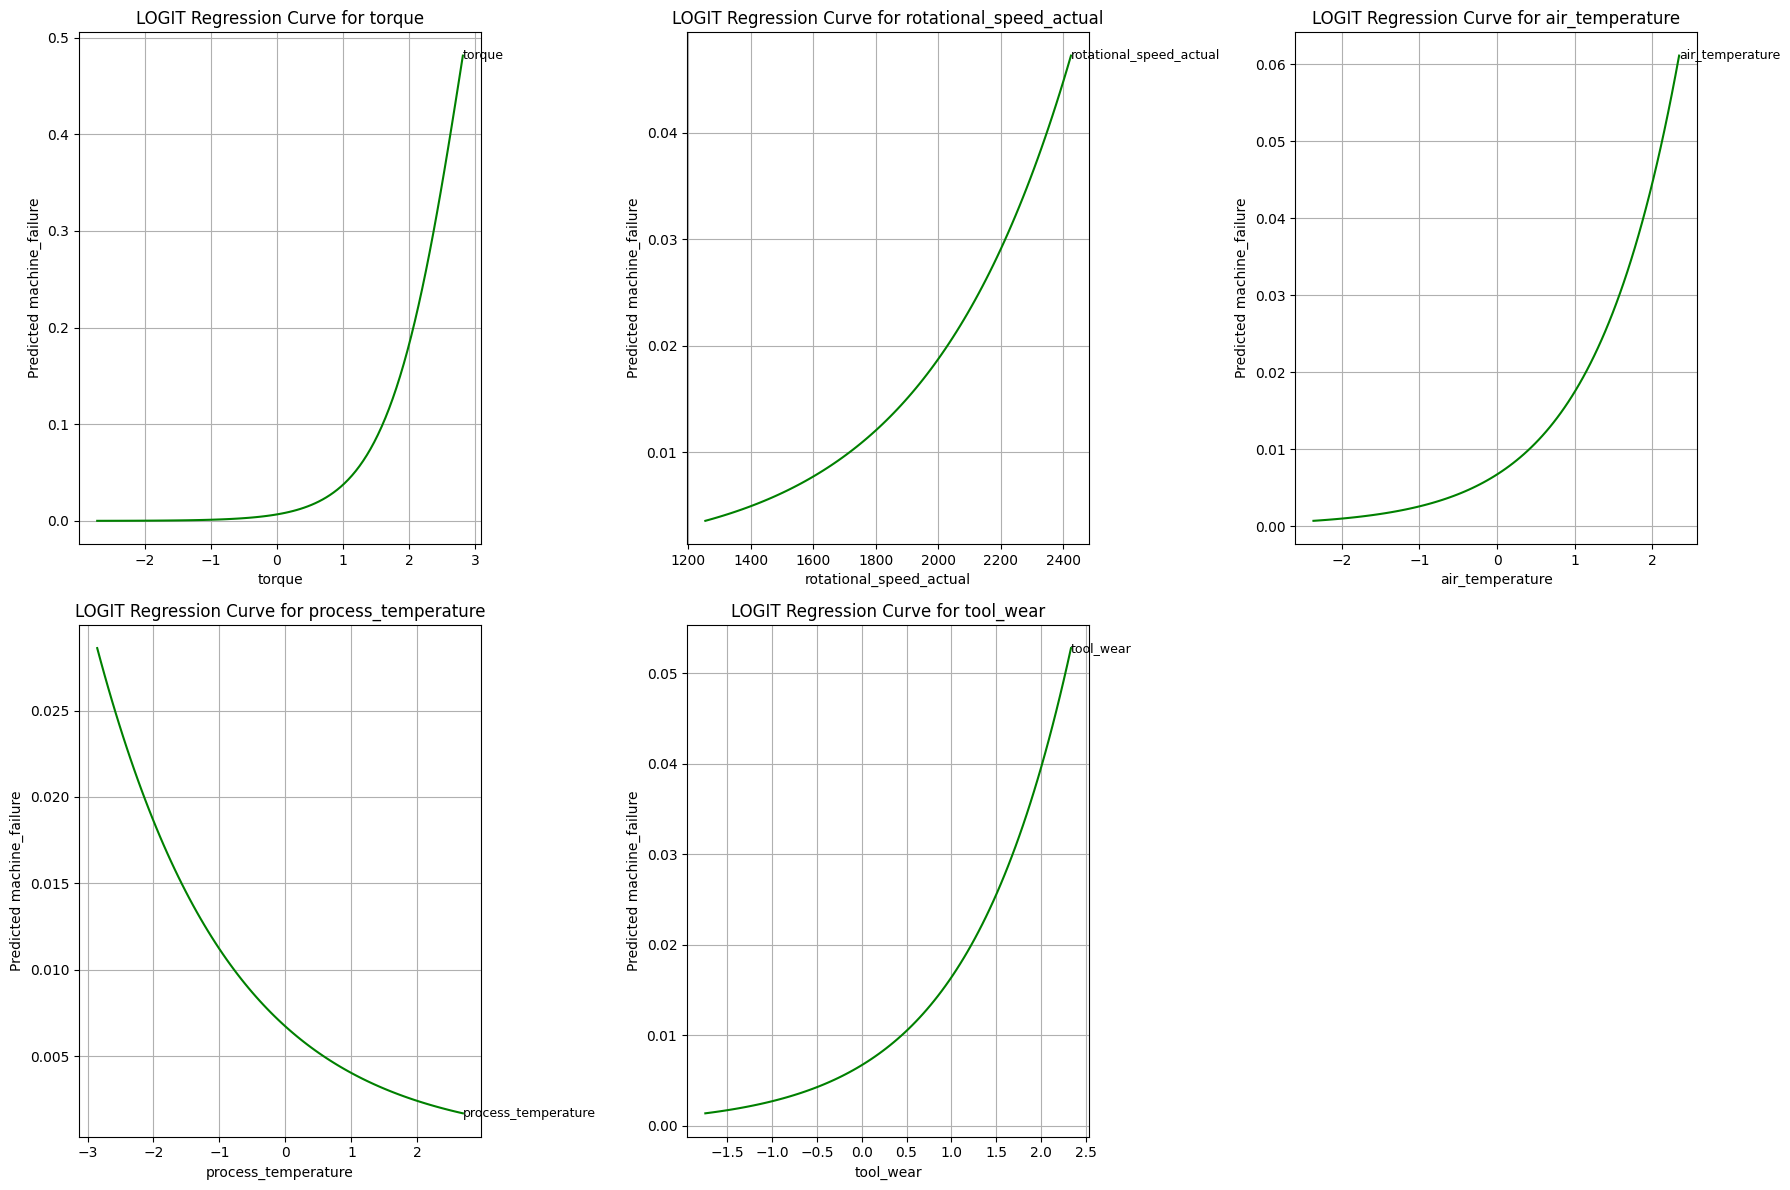

In [61]:
# Plot Logistic regression curves for each predictor variable in individual plots
predictor_vars = ['torque', 'rotational_speed_actual', 'air_temperature', 'process_temperature', 'tool_wear']
model.plot_model_curves(predictor_vars, model='logit', ncols=3)

# TODO: make the y-axis up to 1 here 

# Analysis & Visualisation 

In [80]:
print('##############################################################################')
print('Step 0: Load the Data')
load_data = LoadData('failure_data.csv')  # Instantiate the class with your file name
failure_data_df = load_data.df  # Access the loaded DataFrame
print('##############################################################################')
print('Step 1: Initial Data Cleaning')
dt = DataTransform(failure_data_df)
failure_data_df = dt.drop_column(['Unnamed: 0', 'Product ID'])

dt = DataTransform(failure_data_df)
type_dummy_df = dt.create_dummies_from_column('Type')
failure_data_df = dt.concat_dataframes(type_dummy_df)

info = DataFrameInfo(failure_data_df)
print(f"\nColumns After concatination: \n{info.column_names()}")
print('##############################################################################')
print('Step 2: Impute missing values')
imputation_dict = {
    'Air temperature [K]': 'median',
    'Process temperature [K]': 'mean',
    'Tool wear [min]': 'median'
}
dt = DataTransform(failure_data_df)
failure_data_df = dt.impute_missing_values(imputation_dict)
info = DataFrameInfo(failure_data_df)
print(f"\nCheck\nPercentage of Null Values for each column after imputation: \n{info.percentage_of_null()}")
print('##############################################################################')
print('Step 3: Treating Skewness')
dt = DataTransform(failure_data_df)
info = DataFrameInfo(failure_data_df)
print(f"\nSkew Test Before treatement: {info.skew_test('Rotational speed [rpm]')}")
failure_data_df = dt.treat_skewness(column_name='Rotational speed [rpm]', normalied_column_name='rotational_speed_normalised', method='yeojohnson') # 
info = DataFrameInfo(failure_data_df)
print(f"\nSkew Test After treatement: {info.skew_test('rotational_speed_normalised')}")
print('##############################################################################')
print('Step 4: Removing Outliers')
dt = DataTransform(failure_data_df)

info = DataFrameInfo(failure_data_df)
outlier_columns = ['rotational_speed_normalised', 'Torque [Nm]', 'Process temperature [K]']
print(f"\nBefore Removing outliers: {info.describe_statistics(outlier_columns)}")

failure_data_df, _, _ = dt.remove_outliers_with_optimiser(outlier_columns, key_ID='UDI', method='IQR', suppress_output=True)

info = DataFrameInfo(failure_data_df)
print(f"\nAfter Removing outliers: {info.describe_statistics(outlier_columns)}")
print('##############################################################################')
dt = DataTransform(failure_data_df)
machine_failure_col_mapping = {
    'Machine failure': 'machine_failure',
    'Air temperature [K]': 'air_temperature',
    'Process temperature [K]': 'process_temperature',
    'Rotational speed [rpm]': 'rotational_speed_actual',
    'Torque [Nm]': 'torque',
    'Tool wear [min]': 'tool_wear',
    'TWF': 'tool_wear_failure',
    'HDF': 'head_dissapation_failure',
    'PWF': 'power_failure',
    'OSF': 'overstrain_failure',
    'RNF': 'random_failure'
}
# rename df 
failure_data_df = dt.rename_colunms(machine_failure_col_mapping)
print('##############################################################################')

##############################################################################
Step 0: Load the Data
File found: /Users/manishkhurmi/Desktop/EDA_project/failure_data.csv
DataFrame loaded successfully from /Users/manishkhurmi/Desktop/EDA_project/failure_data.csv.
##############################################################################
Step 1: Initial Data Cleaning
Column List: 
 Index(['Unnamed: 0', 'UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

Column List After dropping df
: Index(['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

Columns After concatination: 
Index(['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K

### M4) Task 1: Current operating ranges 

In this task if you're unsure what each column represents you may want to keep your data dictionary on hand as a reference. The business would like to understand at what ranges the machine is operating at currently. Create a table which displays to operating ranges of:

- Air Temperature
- Process temperature
- Rotational speed 
- Torque [Nm]
- Tool wear [min]

In [81]:
columns_of_interest=['air_temperature', 'process_temperature', 'rotational_speed_actual','torque', 'tool_wear']

info = DataFrameInfo(failure_data_df)
range_df_failure_data = info.range_df(columns_of_interest)
print('Range across DF')
print(range_df_failure_data)

Range across DF
                            Min     Max
Variables                              
air_temperature           295.5   304.5
process_temperature       306.0   313.8
rotational_speed_actual  1255.0  2424.0
torque                     13.9    66.8
tool_wear                   0.0   253.0


Then breakdown the same data to understand the ranges for each of the different product quality types.

In [82]:
# Range split by Product Type (L, M, H)

columns_of_interest=['air_temperature', 'process_temperature', 'rotational_speed_actual','torque', 'tool_wear']

info = DataFrameInfo(failure_data_df)
range_df_failure_data = info.range_df(columns_of_interest)

unique_product_types = failure_data_df['Type'].unique()
for i in unique_product_types:
    print(f"\nProduct Type {i}:")
    filtered_df = failure_data_df[failure_data_df['Type'] == i]
    info=DataFrameInfo(filtered_df)
    type_range_df = info.range_df(columns_of_interest)
    print(type_range_df)


Product Type L:
                            Min     Max
Variables                              
air_temperature           295.5   304.5
process_temperature       306.0   313.8
rotational_speed_actual  1255.0  2424.0
torque                     14.2    66.8
tool_wear                   0.0   251.0

Product Type M:
                            Min     Max
Variables                              
air_temperature           295.5   304.4
process_temperature       306.0   313.8
rotational_speed_actual  1255.0  2372.0
torque                     13.9    65.9
tool_wear                   0.0   253.0

Product Type H:
                            Min     Max
Variables                              
air_temperature           295.6   304.2
process_temperature       306.0   313.5
rotational_speed_actual  1256.0  2370.0
torque                     14.7    65.3
tool_wear                   0.0   246.0


The management would also like to know the upper limits of tool wear the machine tools have been operating at. Create a visualisation displaying the number of tools operating at different tool wear values.

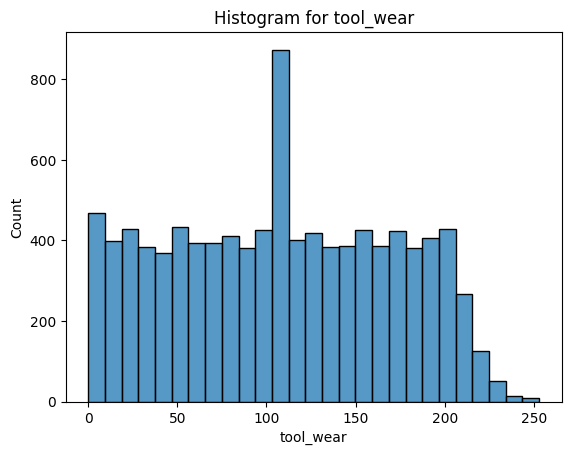

In [83]:
plott = Plotter(failure_data_df)
plott.histplot('tool_wear')
plt.show()

- The Upper limit of `Tool Wear` is 200 - 250 rpm

### Task 2: Determine the failure rate in the process

You've been tasked with determining how many and the leading causes of failure are in the manufacturing process.


Determine and visualise how many failures have happened in the process, what percentage is this of the total? Check if the failures are being caused based on the quality of the product.

In [84]:
failure_types = ['machine_failure', 'tool_wear_failure', 'head_dissapation_failure', 'power_failure','overstrain_failure','random_failure']

failure_sum_df = failure_data_df[failure_types].sum()
print(failure_sum_df) # TODO: needs a column heading

machine_failure_total = failure_sum_df[0]
sum_of_other_machine_failures = sum(failure_sum_df[1:])

# Check if the total of other machine failure types equals the machine_failure count
are_failures_equal = machine_failure_total == sum_of_other_machine_failures

# check if the other machine failure types equal the machine_failure count
print(f'Do the Total number of other failure types (RNF, PWF,..etc) equal the `machine_failure` total?: \n{are_failures_equal}')

if not are_failures_equal:
    print('''This result is `False`, indicating that the `machine_failure` flag can represent 
         multiple failure types for a single observation. For example, one observation can contain both 
         a random failure and a PWF failure.''')

machine_failure             268
tool_wear_failure            46
head_dissapation_failure    109
power_failure                33
overstrain_failure           85
random_failure               19
dtype: int64
Do the Total number of other failure types (RNF, PWF,..etc) equal the `machine_failure` total?: 
False
This result is `False`, indicating that the `machine_failure` flag can represent 
         multiple failure types for a single observation. For example, one observation can contain both 
         a random failure and a PWF failure.


/var/folders/5k/scs93vzn4cg5yycybmzlxrk00000gn/T/ipykernel_5377/4268357607.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  machine_failure_total = failure_sum_df[0]


In [85]:
failure_data_df['failure'] = (
    (failure_data_df['machine_failure'] == 1) | 
    (failure_data_df['tool_wear_failure'] == 1) | 
    (failure_data_df['head_dissapation_failure'] == 1) | 
    (failure_data_df['power_failure'] == 1) | 
    (failure_data_df['overstrain_failure'] == 1) | 
    (failure_data_df['random_failure'] == 1)
).astype(int)

Number of Failures is defined as observation that failed for ANY failure type
Number of Failures: 286
Percentage Failure Rate: 2.8988445165213865


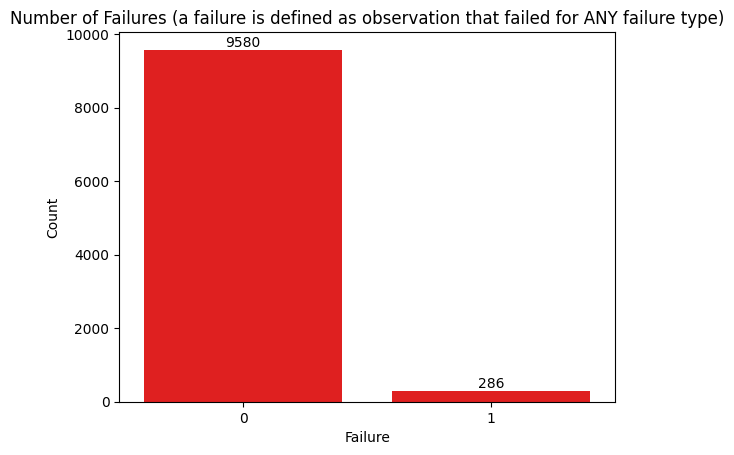

In [86]:
import seaborn as sns

print('Number of Failures is defined as observation that failed for ANY failure type')
number_of_failures = failure_data_df['failure'].sum()
print(f"Number of Failures: {number_of_failures}")

percentage_failure_rate = (number_of_failures/ len(failure_data_df)) * 100
print(f"Percentage Failure Rate: {percentage_failure_rate}")

ax = sns.countplot(failure_data_df, x='failure', color='red')
# Add data labels to each bar
ax.bar_label(ax.containers[0])
plt.title('Number of Failures (a failure is defined as observation that failed for ANY failure type)')
plt.xlabel('Failure')
plt.ylabel('Count')
# Show the plot
plt.show()



machine_failure             2.716400
tool_wear_failure           0.466248
head_dissapation_failure    1.104804
power_failure               0.334482
overstrain_failure          0.861545
random_failure              0.192581
dtype: float64


/var/folders/5k/scs93vzn4cg5yycybmzlxrk00000gn/T/ipykernel_5377/1655058360.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


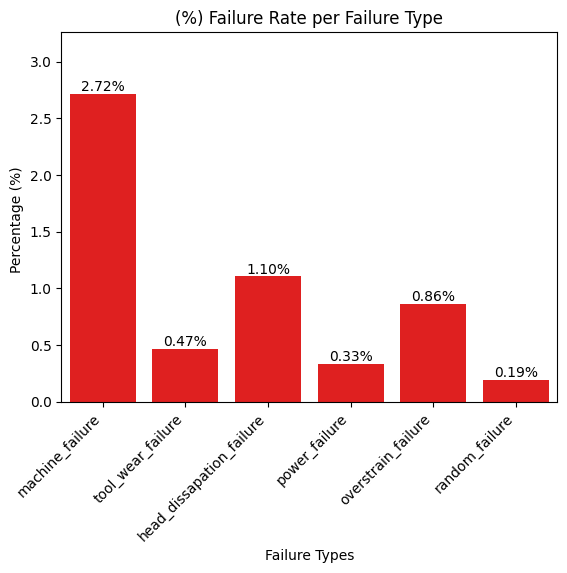

In [87]:
# # T2a) Calculate the % failure for each failure type
print('\n')
percentage_failures_df = failure_sum_df / len(failure_data_df) * 100 
print(percentage_failures_df) # TODO: needs a column heading

# Barplot of Percentage Failures
ax = sns.barplot(percentage_failures_df, color='red')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%') 
ax.set_title('(%) Failure Rate per Failure Type')
ax.set_ylabel('Percentage (%) ')
ax.set_ylim(0, percentage_failures_df.max() * 1.2) 
ax.set_xlabel('Failure Types')
# Rotate x-axis lables
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

/var/folders/5k/scs93vzn4cg5yycybmzlxrk00000gn/T/ipykernel_5377/2036274302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(failure_data_df, x='Type', palette='Blues')


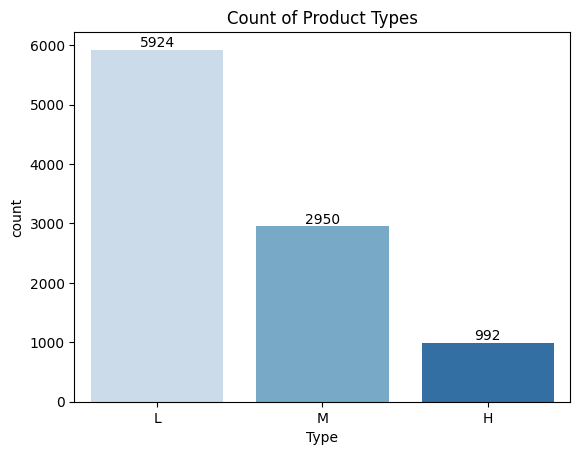

In [88]:
# Countplot: Product Types
ax = sns.countplot(failure_data_df, x='Type', palette='Blues')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f') # integer formatting
ax.set_title('Count of Product Types')
plt.show()

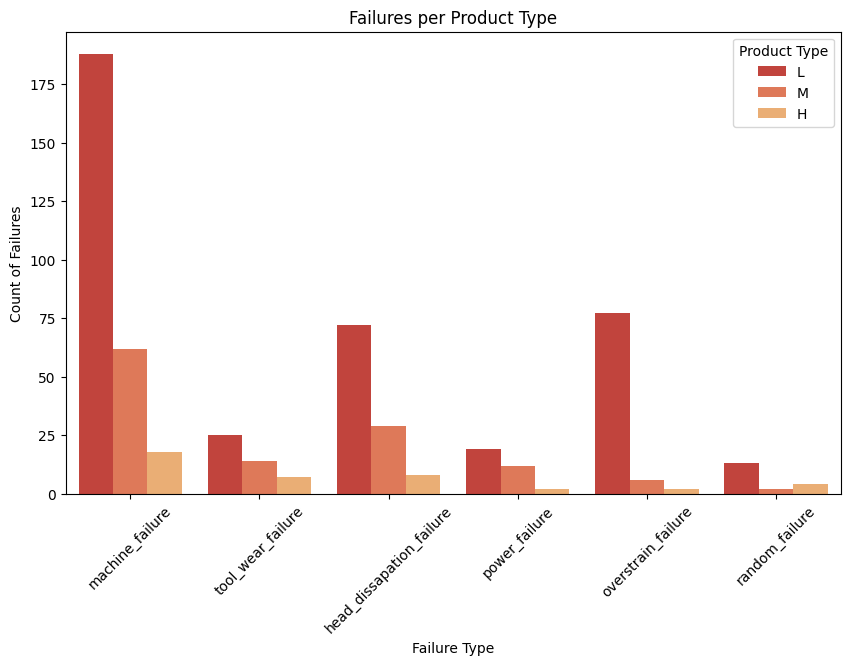

Leading cause of failure is in product type L, although this is biased as there are lot more observations for L product type than the rest.
machine_failure, overstrain_failure and head_dissapation_failures are the highest across the product


In [89]:
# Group by 'Type' and sum the failure columns
failures_per_type = failure_data_df.groupby('Type')[['machine_failure','tool_wear_failure', 'head_dissapation_failure', 'power_failure', 'overstrain_failure', 'random_failure']].sum()
# Reset Index
failures_per_type = failures_per_type.reset_index()
# Ensure the 'Type' column is categorical and ordered as 'L', 'M', 'H'
failures_per_type['Type'] = pd.Categorical(failures_per_type['Type'], categories=['L', 'M', 'H'], ordered=True)
# Reindex to ensure order
failures_per_type = failures_per_type.set_index('Type').loc[['L', 'M', 'H']]
# Convert the DataFrame back to a long format using melt
failures_per_type_melted = failures_per_type.reset_index().melt(id_vars='Type', var_name='Failure Type', value_name='Count')
# Define custom colors: different shades of red for 'L', 'M', 'H'
custom_palette = {
    'L': '#d73027',  # Dark red
    'M': '#f46d43',  # Medium red
    'H': '#fdae61'   # Light red
}
# Plot using seaborn's barplot with custom colors based on the product type (L, M, H)
plt.figure(figsize=(10, 6))
sns.barplot(x='Failure Type', y='Count', hue='Type', data=failures_per_type_melted, palette=custom_palette)
# Add labels and title
plt.title('Failures per Product Type')
plt.xlabel('Failure Type')
plt.ylabel('Count of Failures')
plt.legend(title='Product Type')
# Show the plot
plt.xticks(rotation=45)
plt.show()

print('Leading cause of failure is in product type L, although this is biased as there are lot more observations for L product type than the rest.')
print('machine_failure, overstrain_failure and head_dissapation_failures are the highest across the product')

### Task 3 

With the failures identified you will need to dive deeper into what the possible causes of failure might be in the process.

3a) For each different possible type of failure try to investigate if there is any correlation between any of the settings the machine was running at. 

In [90]:
# Drop columns for correlation heat map
print(failure_data_df.head())
print(failure_data_df.columns)
dt = DataTransform(failure_data_df)
failure_data_df = dt.drop_column(['UDI', 'Type'])

    UDI Type  air_temperature  process_temperature  rotational_speed_actual  \
0  3416    L            301.4                310.4                     1579   
1  7130    L            300.6                310.0                     1635   
2  2320    M            299.2                308.8                     1700   
3  9601    M            298.9                310.0                     1561   
4   614    L            298.1                309.9                     1634   

   torque  tool_wear  machine_failure  tool_wear_failure  \
0    36.9      133.0                0                  0   
1    31.0      107.0                0                  0   
2    33.5      185.0                0                  0   
3    45.3       58.0                0                  0   
4    30.0       53.0                0                  0   

   head_dissapation_failure  power_failure  overstrain_failure  \
0                         0              0                   0   
1                         0     

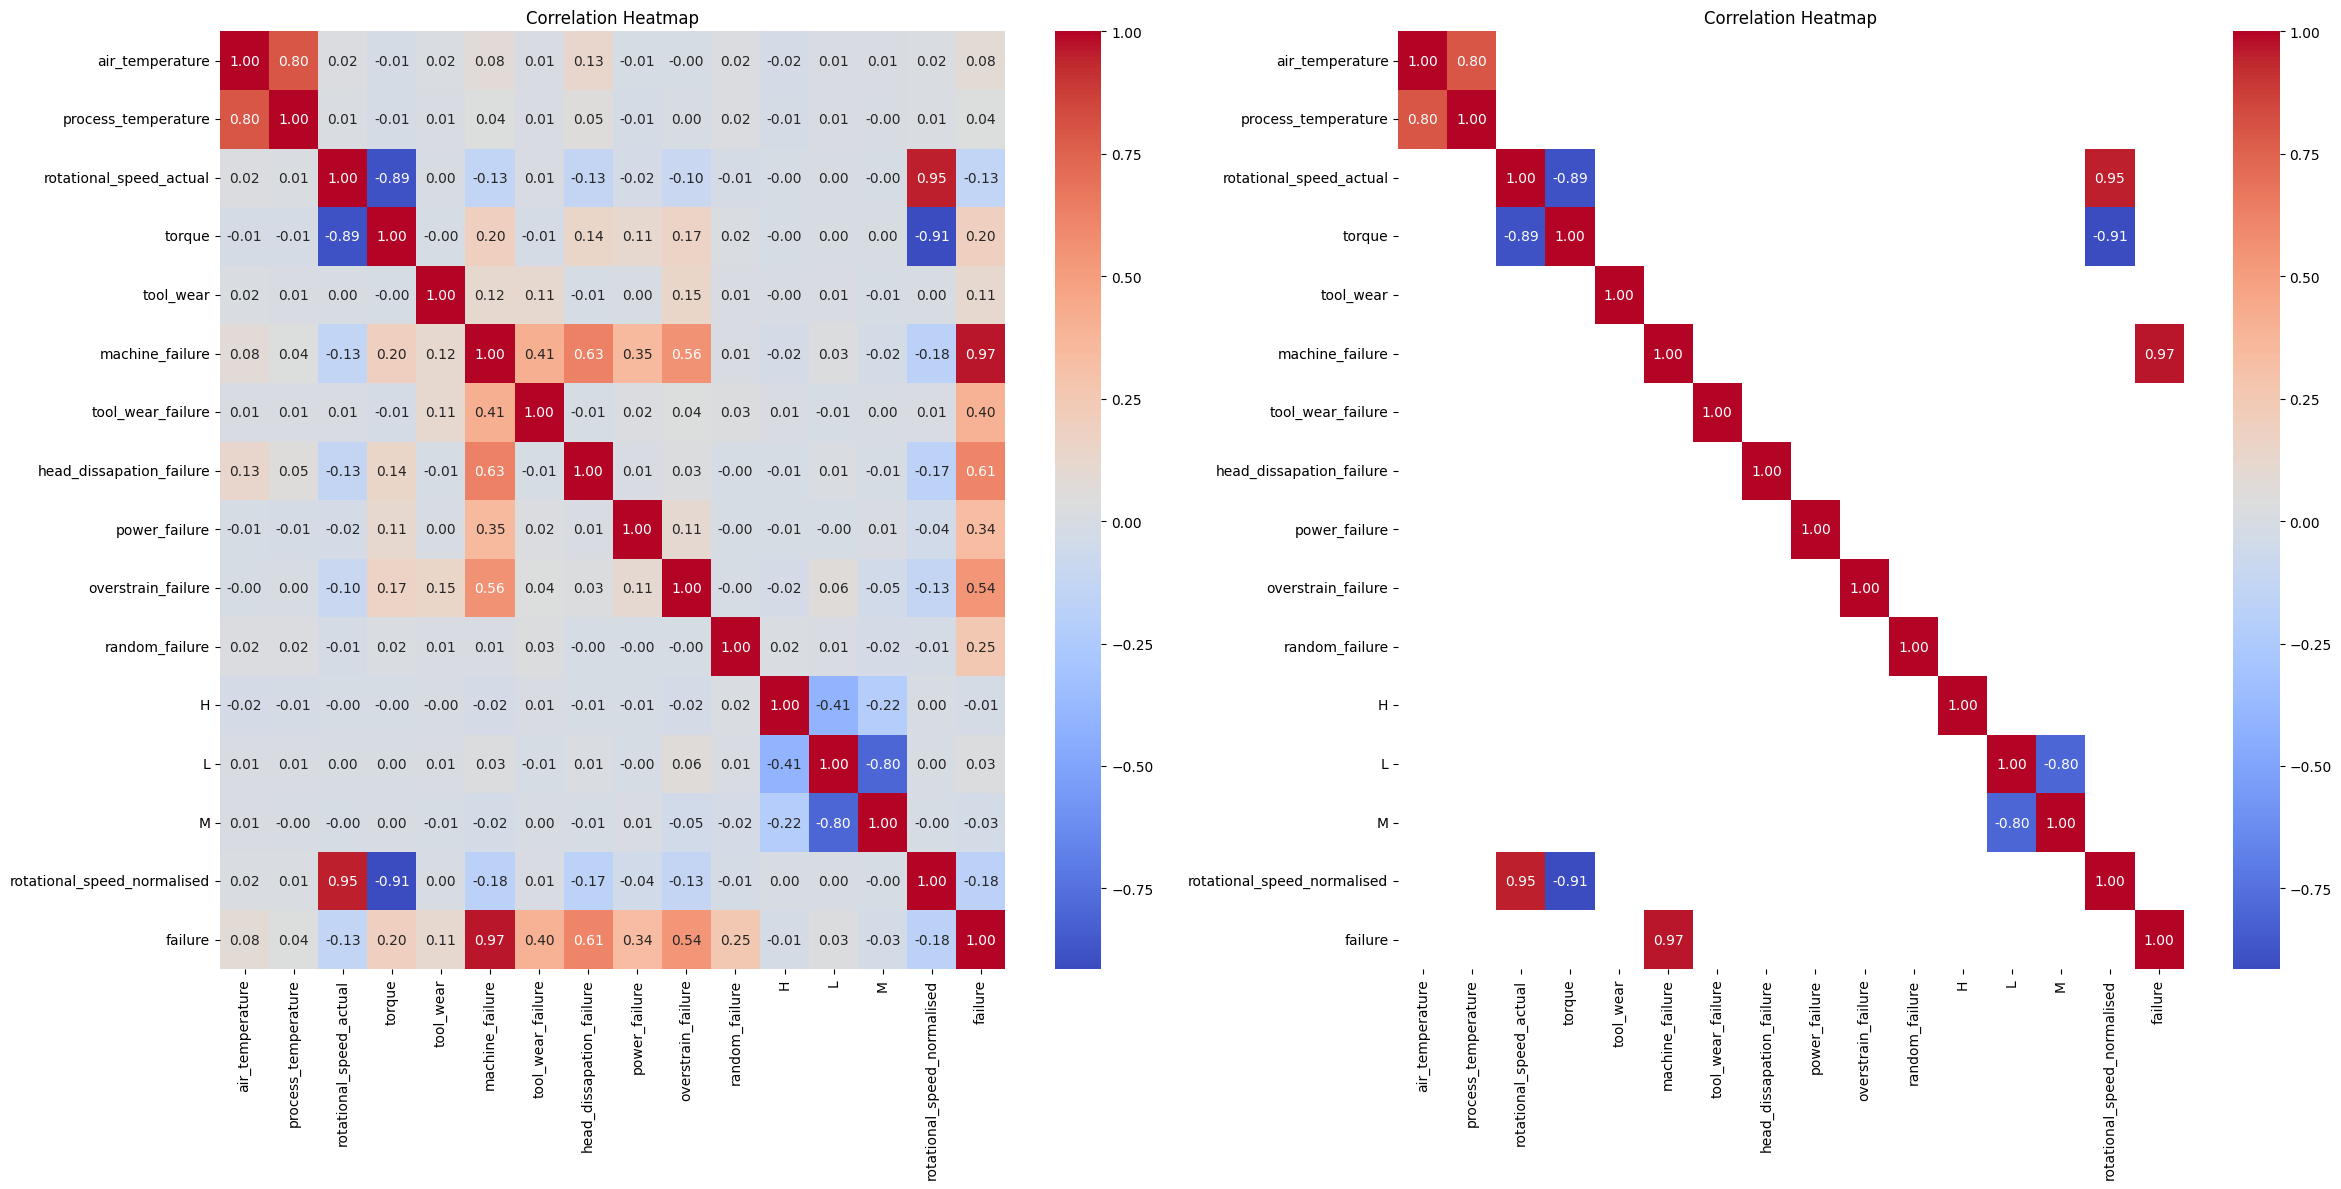

Machine failure is weakly correlated with OSF, HDF and TWF


In [92]:
# Initialize the Plotter with DataFrame
plott = Plotter(failure_data_df)
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 12))
# Plot the first heatmap on the left subplot (no threshold)
plott.correlation_heatmap(figsize=(10, 8), ax=axes[0])
# Plot the second heatmap with a threshold on the right subplot
plott.correlation_heatmap(threshold=0.75, figsize=(10, 8), ax=axes[1])
# # Adjust layout and show the plots
plt.tight_layout()
plt.show()

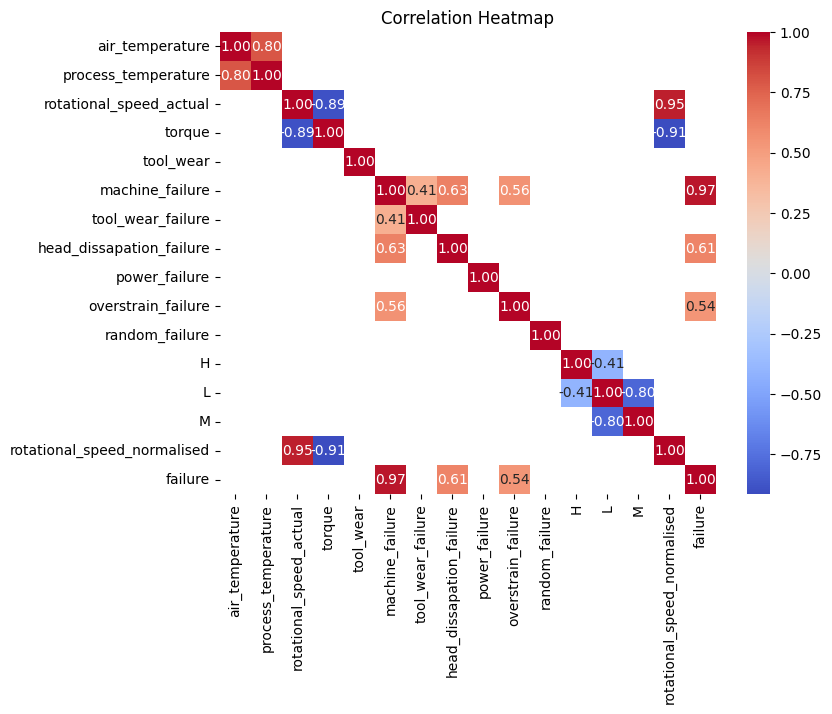

Machine failure is weakly correlated with OSF, HDF and TWF


In [104]:
plott = Plotter(failure_data_df)
plott.correlation_heatmap(threshold=0.40, figsize=(8,6))
plt.show()

print('Machine failure is weakly correlated with OSF, HDF and TWF')

3b) Do the failures happen at certain torque ranges, processing temperatures or rpm?

In [114]:
# OLS model 
model = Models(failure_data_df)
predictor_vars = ['torque', 'rotational_speed_actual', 'air_temperature', 'process_temperature', 'tool_wear']
ols_model_machine_failure = model.ols(formula = "machine_failure ~ air_temperature + process_temperature + rotational_speed_actual + torque + tool_wear", model_summary=1)

                    Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.071     
Dependent Variable:   machine_failure   AIC:                 -8568.6163
Date:                 2024-10-14 17:50  BIC:                 -8525.4352
No. Observations:     9866              Log-Likelihood:      4290.3    
Df Model:             5                 F-statistic:         151.9     
Df Residuals:         9860              Prob (F-statistic):  7.12e-156 
R-squared:            0.072             Scale:               0.024551  
-----------------------------------------------------------------------
                         Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept               -1.4466   0.3534 -4.0931 0.0000 -2.1393 -0.7538
air_temperature          0.0117   0.0014  8.5507 0.0000  0.0090  0.0144
process_temperature     -0.0086   0.0019 -4.6257 0.0000 -0.0122 -0.0049
rotational_s

In [115]:
# LOGIT Model 
model = Models(failure_data_df)
predictor_vars = ['torque', 'rotational_speed_actual', 'air_temperature', 'process_temperature', 'tool_wear']
# Prove that LOGIT model is better than OLS based on OLS's r-squared alone and the benefit that logistiric regression provides when variables are binary (1,0).
logit_model_machine_failure = model.logit(formula = "machine_failure ~ air_temperature + process_temperature + rotational_speed_actual + torque + tool_wear", model_summary=1)

Optimization terminated successfully.
         Current function value: 0.090565
         Iterations 10
                              Results: Logit
Model:                  Logit              Method:             MLE        
Dependent Variable:     machine_failure    Pseudo R-squared:   0.274      
Date:                   2024-10-14 17:50   AIC:                1799.0272  
No. Observations:       9866               BIC:                1842.2083  
Df Model:               5                  Log-Likelihood:     -893.51    
Df Residuals:           9860               LL-Null:            -1230.7    
Converged:              1.0000             LLR p-value:        1.7094e-143
No. Iterations:         10.0000            Scale:              1.0000     
--------------------------------------------------------------------------
                         Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
Intercept               -55

In [117]:
print('R squared of logit model is shows a better fit than that of OLS.') # TODO: explain this better

R squared of logit model is shows a better fit than that of OLS.


Optimization terminated successfully.
         Current function value: 0.090565
         Iterations 10


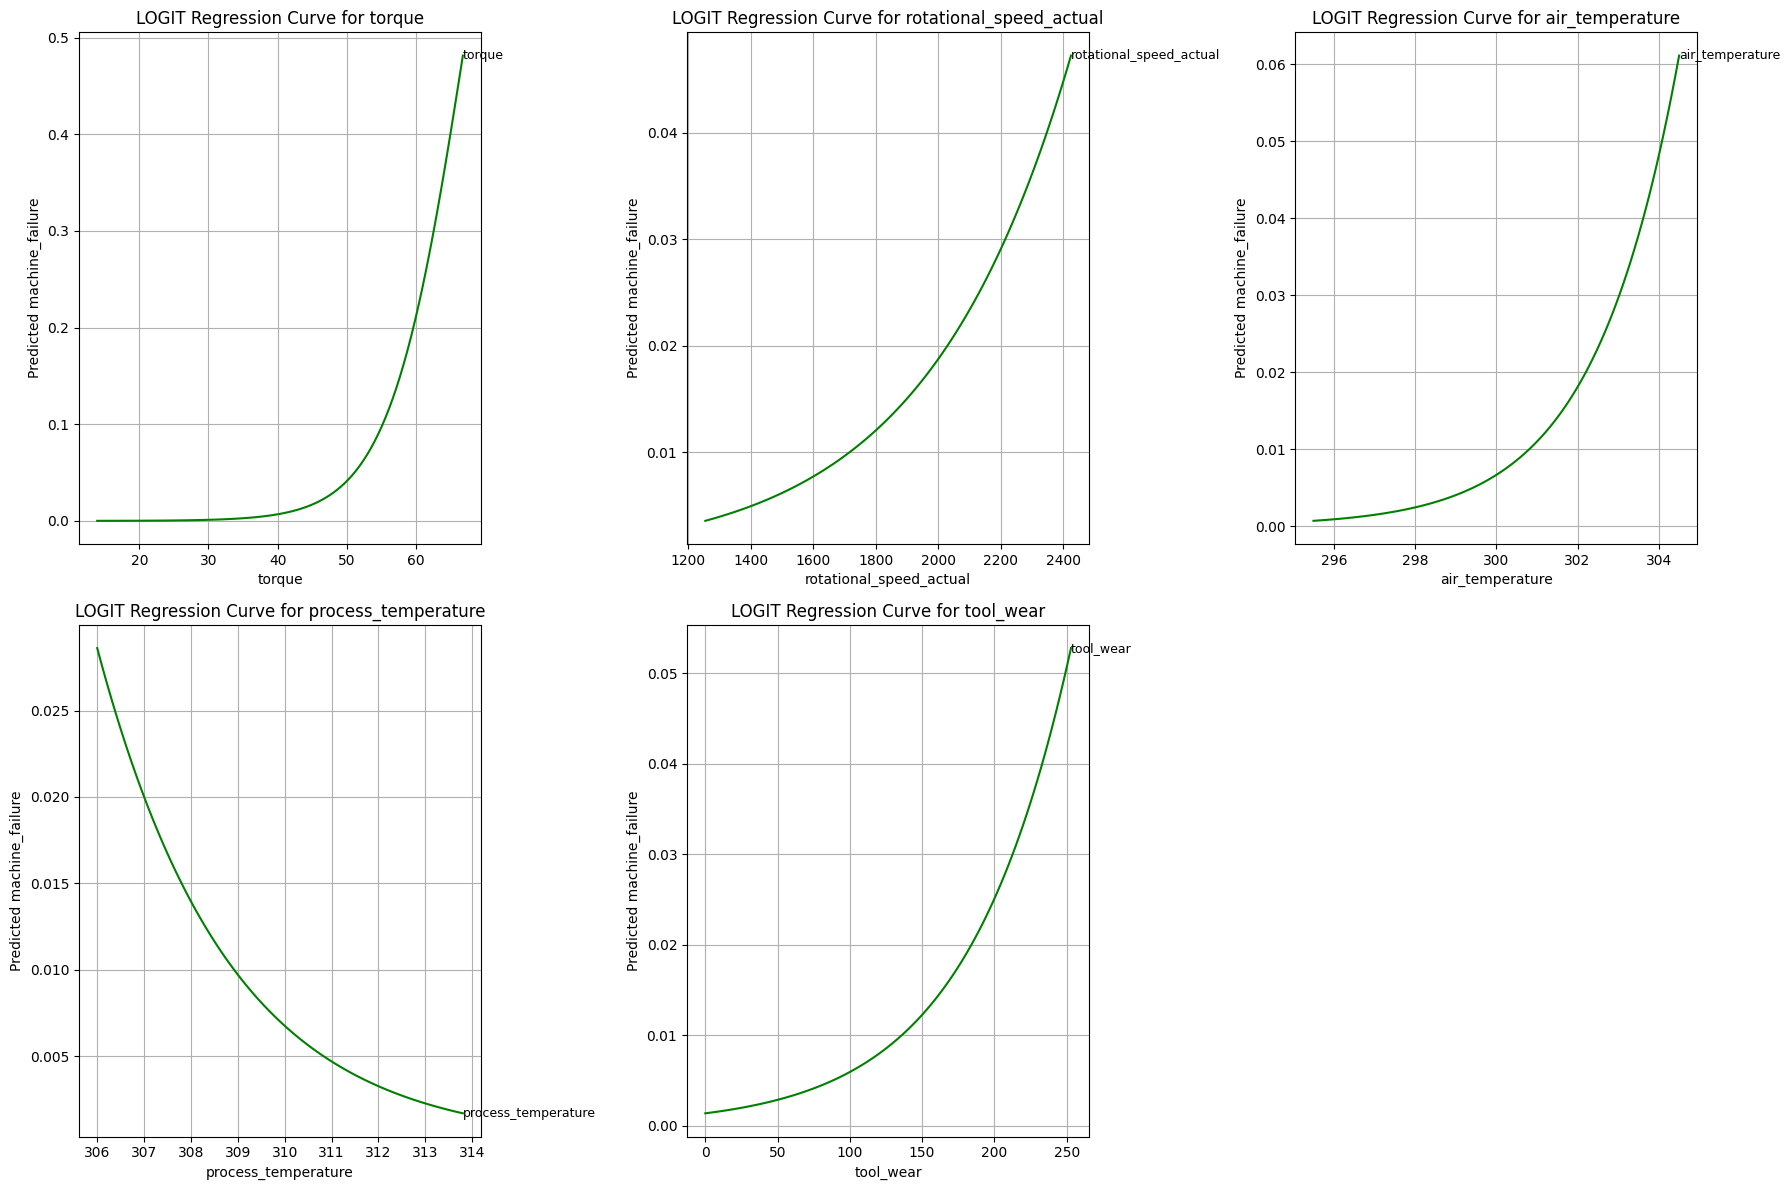

In [106]:
# Logistic Regression: Model Curves 
# model.plot_model_curves(predictor_vars, model='logit', combine_plots=1, standardize=True)
model.plot_model_curves(predictor_vars, model='logit', ncols=3, standardize=False)

# Appendix

### Appendix - OLS Model, inpreparation for VIFS 

In [65]:
# TODO: Appendix 
# ## fit a linear model to predict machine_failure from the continous independant variables 
# print('OLS model: using rotational_speed without normalisation')
# ols_1 = smf.ols("machine_failure ~ air_temperature + process_temperature + rotational_speed_original + torque + tool_wear", failure_data_step_5_collinearity).fit()
# print(ols_1.summary())

In [66]:
# TODO: Appendix 
# print('OLS model: using NORMALISED rotational speed')
# ols_2 = smf.ols('machine_failure ~ air_temperature + process_temperature + rotational_speed_normalised + torque + tool_wear', failure_data_step_5_collinearity).fit()
# print(ols_2.summary())


- Use the `r^2` term from the OLS model using `rotational_speed_normalised`
- Note that the OLS model that uses `rotational_speed_normalised` gives a statitically significant p-value vs the `rotational_speed_orginal`which is statistically insignificant. This is expected as OLS relies on the assumption that the data follows a normal distribution.
- Further validating that `rotational_speed` was skewed. 


### VIFS 

*Variation Inflation Factor*, or VIF. This method is more powerful than the aforementioned as we fit a linear regression model on one of our independent variables against all the other exogenous variables. Mathematically, for one variable `X_1`:
$$
\hat{X_1} = \beta_0 + \beta_1(X_2) + \beta_2(X_3) + ...
$$

Subsequently, we'd work out the VIF, which uses the `R^2` obtained from the model:
$$
\text{VIF} \equiv \frac{1}{1-R^2_1}
$$

#### Scratch work for section 5 

In [67]:
# TODO: Appendix 
# Example using the dependant variable and `Air Temperature `

# Calculate the point-biserial correlation and p-value
r_pb, p_value = pointbiserialr(failure_data_without_null['Machine failure'], failure_data_without_null['Air temperature [K]'])

# Print the results with an explainable statement
print(f"The point-biserial correlation coefficient between 'Machine failure' and 'Air temperature [K]' is {round(r_pb, 3)} with a p-value of {round(p_value, 4)}.")
print("The null hypothesis is that there is no correlation between 'Machine failure' and 'Air temperature [K]' (r_pb = 0).")

# Interpretation of the p-value
if p_value < 0.05:
    print("Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant correlation.")
else:
    print("Since the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that there is no significant correlation.")

# Interpretation of the r_pb value
if r_pb > 0:
    direction = "positive"
else:
    direction = "negative"

strength = ""
abs_r_pb = abs(r_pb)
if abs_r_pb < 0.1:
    strength = "negligible"
elif abs_r_pb < 0.3:
    strength = "weak"
elif abs_r_pb < 0.5:
    strength = "moderate"
else:
    strength = "strong"

print(f"The correlation is {direction} and the strength of the correlation is {strength}.")

NameError: name 'pointbiserialr' is not defined

- In the context of time we will continue without this and give more attention to the collinearity section

In [ ]:
# TODO: Appendix 
failure_data_without_null = failure_data_treating_outliers
# Identify binary and continuous variables
binary_vars = [col for col in failure_data_without_null.columns if failure_data_without_null[col].nunique() == 2]
continuous_vars = [col for col in failure_data_without_null.columns if failure_data_without_null[col].dtype in ['int64', 'float64'] and failure_data_without_null[col].nunique() > 2]

# Initialize the correlation matrix
corr_matrix = pd.DataFrame(np.zeros((len(failure_data_without_null.columns), len(failure_data_without_null.columns))), index=failure_data_without_null.columns, columns=failure_data_without_null.columns)

# Compute correlations
for var1 in failure_data_without_null.columns:
    for var2 in failure_data_without_null.columns:
        if var1 == var2:
            corr_matrix.loc[var1, var2] = 1.0  # Correlation with itself is 1
        elif var1 in binary_vars and var2 in continuous_vars:
            r_pb, _ = pointbiserialr(failure_data_without_null[var1], failure_data_without_null[var2])
            corr_matrix.loc[var1, var2] = r_pb
            corr_matrix.loc[var2, var1] = r_pb
        elif var1 in continuous_vars and var2 in continuous_vars:
            r_pearson, _ = pearsonr(failure_data_without_null[var1], failure_data_without_null[var2])
            corr_matrix.loc[var1, var2] = r_pearson
            corr_matrix.loc[var2, var1] = r_pearson

# Plot the heatmap with annotations rounded to 2 decimal places
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


- P values of `process_temp`, `torque` and `tool_wear` are close to 0, rejecting the null hypothesis in support of the alternative hypothesis the data is statistically related to the dependant variable. Therefore changes in these variables are associated with changes with the liklihood of `machine_failure` occuring.

## Appendix - Skewness

In [ ]:
# TODO: put this in the appendix 
# measuring skewness 
# Begin with our dependant variable "Machine failure". As it's binary data, we will visualise the frequency of the data 

failure_data_without_null['Machine failure'].hist()
plt.title('Histogram of Machine Failures ')

# Strongly biased towards `0` indicating that majority of the data gives information about machines that did NOT fail during the manufacturing process.


In [ ]:
# TODO: put this in the appendix 
# interpreting the skew() value

data = [(10, 20, 30, 40, 50, 60, 70), 
        (10, 20, 30, 40, 30, 20, 10) ]
df = pd.DataFrame(data)
df
skew_value = df.skew(axis=1)
print(skew_value)

df.iloc[0].plot()
df.iloc[1].plot()

- In the first row of the data the values are `(10, 20, 30, 40, 50, 60, 70)`, plotted by the blue line. This is a perfectly symmetrical data set when considered with respect to the mean. Even though the values are increasing, they are evenly spaced, and the distribution around the mean is symmetric.SystemError

TODO: put the underlying skew calculation (theory) in the appendix.

In [ ]:
#### Skew test & Histogram
failure_data_without_null = pd.read_csv('failure_data_step_2_removed_null.csv')
info = DataFrameInfo(failure_data_without_null)
failure_data_without_null['Air temperature [K]'].skew()

##### Deciding which varibales to treat for skewness based on Q-Q plot & Normality tests 
- QQ plot with normality test results 

In [ ]:
plott = Plotter(failure_data_without_null)
info = DataFrameInfo(failure_data_without_null)

plott.plot_qq('Air temperature [K]')
print('Normality test Air temperature [K]')
info.normal_test('Air temperature [K]')

In [ ]:
continous_variables = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

In [ ]:
# plott = Plotter(failure_data_without_null)
# info = DataFrameInfo(failure_data_without_null)

# continous_variables = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# for i in continous_variables:
#     plott.plot_qq(i)
#     print(f'Normality test for {i}')
#     info.normal_test(i)

In [ ]:
# Subplots: Q-Q & Normal Test 
# Define the continuous variables
continuous_variables = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Create a grid for the plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

# Loop through each continuous variable and create the Q-Q plot
for i, var in enumerate(continuous_variables):
    ax = axes[i]
    stats.probplot(failure_data_without_null[var], dist="norm", plot=ax)
    stat, p = stats.normaltest(failure_data_without_null[var])
    
    # Add the normality test results to the plot
    ax.annotate(f'Statistics={stat:.3f}, p={p:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', 
                fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
    ax.set_title(f'Q-Q plot for {var}')
    
# Remove any empty subplots
for j in range(len(continuous_variables), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
continous_variables

In [ ]:
# TODO: put in appendix
# Khurmi TODO: Make this into a grid of subplots 
# Histogram & Normal Test 

plott = Plotter(failure_data_without_null)
info = DataFrameInfo(failure_data_without_null)

for i in continous_variables:
    plott.histplot(i)
    plt.show()
    print(f'Skew Test: {failure_data_without_null[i].skew()}')


`Rotational speed [rpm]` will need treatement for skewed data
- The histogram for `Rotational speed [rpm]` shows a clearly visible positive skew of data. The skew test value is 1.99 above the greater than 1 threshold that depicts highly skewed data.

All other variables:
- skew test values suggest that they are all relatively close to 0, suggesting the data is symmetrical
- 'Tool wear [min]': a skewness value of 0 suggests that the data is evenly distributed around the mean, with no significant skew to the left or right, which is clearly seen by the histogram, where the majority of the data is fairly uniform up to 200 minutes.

In [ ]:
# # TODO: put in appendix 
# info = DataFrameInfo(failure_data_without_null)
# # info.normal_test()
# print('Normal Test')
# for i in continous_variables:
#     print(i)
#     print(info.normal_test(i))

#### Histogram & Normal Test: 

- `Tool wear [min]` histogram shows a subtle positive skew
- The p-value for `Torque [Nm]` is stongly in favour of the NULL hypthesis as p > 0.75. This is contradictory to the histogram of the data which shows a clear normal distribution

Investigate all three of above variables for skewness.

In [ ]:
skewed_variables = ['Rotational speed [rpm]', 'Tool wear [min]', 'Torque [Nm]']

In [ ]:
# # TODO: Appendix
# # Reject the null hypothesis for all continous variables apart from `Torque`. As the p-value suggests fairly strong evidence for a normal distribution for `Torque`
# # ignore UDI, as it is a label rather than a explanatory variable for `Machine failure`
# # visualise the skew for the variables of interest 
#     # Air temperature [K]
#     # Process temperature [K]
#     # Rotational speed [rpm]
#     # Tool wear [min]

# # create histograms and qq plots for each

# plott = Plotter(failure_data_without_null)


# skewed_variables = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Tool wear [min]']
# skewed_variables

# for i in skewed_variables:
#     print(i)
#     plott.histplot(i)





- Rotational speed [rpm]
- Tool wear [min]



#### Air temperature

In [ ]:

plott.histplot('Air temperature [K]')

- `Air temperature [K]`, contains 3 spikes, this likely for each `Type`. Where the Air temperature is higher 'High' quality products and the converse for low quality products 

In [ ]:
plott= Plotter(failure_data_without_null)
plott.plot_qq('Air temperature [K]')

- Air Temperature Q-Q plot shows that there is deviation from in the lower and upper quartiles of the data set.

In [ ]:
# # treating the skewness in Air temperature 
# # Box-Cox Transformation. 
#     # Motivation - out data is positive 

# boxcox_air = failure_data['Air temperature [K]']
# boxcox_air = stats.boxcox(boxcox_air) 
# boxcox_air = pd.Series(boxcox_air[0])
# t=sns.histplot(boxcox_air,label="Skewness: %.2f"%(boxcox_air.skew()) )
# t.legend()
# boxcox_air = pd.Series(boxcox_air[0])

In [ ]:
# # boxcox transformation, did not work as expected, this is because the variance is relatively small, the points are all concentrated. 

# failure_data_without_null['Air temperature [K]']

In [ ]:
# Yeo Johnson transformation

yeojohnson_air = failure_data_without_null['Air temperature [K]']
yeojohnson_air = stats.yeojohnson(yeojohnson_air)
yeojohnson_air= pd.Series(yeojohnson_air[0])
t=sns.histplot(yeojohnson_air,label="Skewness: %.2f"%(yeojohnson_air.skew()) )
t.legend()


In [ ]:
# The YeoJohnson transformation has successfully transformed the data to be symmetrical. The closer the value to zero, the more symmetrical the data. 

In [ ]:
# # compare with original distrubution 
# plott.plot_hist('Air temperature [K]')

#### Process Temperature [K]

In [ ]:
plott.histplot('Process temperature [K]')

- Process temperature [K], contains a spike around 310K and slightly negative skew. This is expected as the increase in temperature maybe due to the variation of products involved, as the quality increases, the process temperature increases. Investigate this with a scatter plot of `Type` vs temperature variables.

In [ ]:
plott.plot_qq('Process temperature [K]')

### Rotational speed and Air temperature are the only variables with Skewness. 

In [ ]:
# # Rotational speed 

# plott.histplot('Rotational speed [rpm]')
# print('histogram shows a positive skew and supports the skew test')

In [ ]:
# plott.plot_qq('Rotational speed [rpm]')
# print('Severe deviation in the upper bound of the data. Slight deviation in the lower bound')
# print('proceed with transformation')

In [ ]:
# As the data is positive and rightly skewed, proceed with a box cox transformation 
log_rotational_speed = failure_data_without_null['Rotational speed [rpm]'].map(lambda i: np.log(i) if i > 0 else 0)
t = sns.histplot(log_rotational_speed, label="Skewness: %.2f"%(log_rotational_speed.skew()))
t.legend()
print("skewness has been reduced, the data is still not symmetrical, proceed with Box-Cox Transformations ")

In [ ]:
# # TODO: appendix 
boxcox_rotational_speed = failure_data_without_null['Rotational speed [rpm]']
boxcox_rotational_speed = stats.boxcox(boxcox_rotational_speed)
boxcox_rotational_speed = pd.Series(boxcox_population[0])
t = sns.histplot(boxcox_rotational_speed, label="Skewness: %.2f"%(boxcox_rotational_speed.skew()))
t.legend()

# boxcox_rotational_speed.head()

In [ ]:
yeojohnson_rotational_speed = failure_data_without_null['Rotational speed [rpm]']
yeojohnson_rotational_speed = stats.yeojohnson(yeojohnson_rotational_speed)
yeojohnson_rotational_speed = pd.Series(yeojohnson_rotational_speed[0])
yeojohnson_rotational_speed_hist = sns.histplot(yeojohnson_rotational_speed, label = "Skewness: %.2f"%(yeojohnson_rotational_speed.skew()))
yeojohnson_rotational_speed_hist.legend()



In [ ]:
# Rotational Speed Side by side comparison
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Original data histogram
sns.histplot(data=failure_data_without_null, x='Rotational speed [rpm]', ax=ax[0])
original_skewness = failure_data_without_null['Rotational speed [rpm]'].skew()
ax[0].set_title(f'Original Data\nSkewness: {original_skewness:.2f}')
ax[0].set_xlabel('Rotational speed [rpm]')
ax[0].set_ylabel('Count')

# Transformed data histogram
yeojohnson_rotational_speed = failure_data_without_null['Rotational speed [rpm]']
yeojohnson_rotational_speed, _ = stats.yeojohnson(yeojohnson_rotational_speed)
yeojohnson_rotational_speed = pd.Series(yeojohnson_rotational_speed)
yeojohnson_rotational_speed_hist = sns.histplot(yeojohnson_rotational_speed, ax=ax[1])

transformed_skewness = yeojohnson_rotational_speed.skew()
ax[1].set_title(f'Transformed Data\nSkewness: {transformed_skewness:.2f}')
ax[1].set_xlabel('Rotational speed [rpm]')
ax[1].set_ylabel('Count')

# Show plot
plt.suptitle('Comparison of Original and Transformed Data Skewness', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# data transformation 
yeojohnson_rotational_speed = failure_data_without_null['Rotational speed [rpm]']
yeojohnson_rotational_speed, _ = stats.yeojohnson(yeojohnson_rotational_speed)
yeojohnson_rotational_speed = pd.Series(yeojohnson_rotational_speed)


In [ ]:
# # TODO: Appendix 
# Do the same for Air Temperature

# Side by side comparison
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Original data histogram
sns.histplot(data=failure_data_without_null, x='Air temperature [K]', ax=ax[0])
original_skewness = failure_data_without_null['Air temperature [K]'].skew()
ax[0].set_title(f'Original Data\nSkewness: {original_skewness:.2f}')
ax[0].set_xlabel('Air temperature [K]')
ax[0].set_ylabel('Count')

# Transformed data histogram
yeojohnson_air = failure_data_without_null['Air temperature [K]']
yeojohnson_air, _ = stats.yeojohnson(yeojohnson_air) # The '_' ignores the second parameter, in this case it is the lambda parameter 
yeojohnson_air = pd.Series(yeojohnson_air)
yeojohnson_air_hist = sns.histplot(yeojohnson_air, ax=ax[1])
transformed_skewness = yeojohnson_air.skew()
ax[1].set_title(f'Transformed Data\nSkewness: {transformed_skewness:.2f}')
ax[1].set_xlabel('Air temperature [K]')
ax[1].set_ylabel('Count')

# Show plot
plt.suptitle('Comparison of Original and Transformed Data Skewness', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Now use the DataTransformation class to add these transformations  

In [ ]:
# create a copy of the data set 
failure_data_cleaned_unskewed = failure_data_without_null.copy(deep=True)

# create a Datatransform instance 
dt = DataTransform(failure_data_cleaned_unskewed)
yeojohnson_rotational_speed = dt.yeojohnson('Rotational speed [rpm]')
failure_data_cleaned_unskewed['Rotational speed [rpm]'] = yeojohnson_rotational_speed

## Quick glance at the df after treating for skewness
# failure_data_cleaned_unskewed.head()
# sum(failure_data_without_null['Air temperature [K]'].isnull())

In [ ]:
print('original data set ')
print('\n')
print(failure_data_without_null[['Air temperature [K]', 'Rotational speed [rpm]']])

In [ ]:
print('After skewness transformations')
print('\n')
print(failure_data_cleaned_unskewed[['Air temperature [K]', 'Rotational speed [rpm]']])
print('\n')
print('The transformation for skewness has been made. The interpretability of `Air temperature [K]` and `Rotational speed` has reduced drastically')

# Ask khushboo how tp sort this out.
# TODO: need to change the df  name for after skewness has been applied, this is so that the code is reproducible 

In [ ]:
info_after_skew_transformation = DataFrameInfo(failure_data_cleaned_unskewed)
print(info_after_skew_transformation.percentage_of_null()[['Air temperature [K]', 'Rotational speed [rpm]']])

print('There is now NaN values in the data set, be aware for the machine learning')

#### Appendix: Removing Outliers (Thought Process) 

In [ ]:
info = DataFrameInfo(failure_data_cleaned_unskewed)
info.continous_variables()

continous_variables = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]']

 # Note the following variables were not included because they are either strings or unique keys, both have no statistical significance
    #'UDI',
    #'Product ID',
    #'Type'

continous_variables


In [ ]:
# box plots of continous variables 
# plott = Plotter(failure_data_cleaned_unskewed)

# for i in continous_variables:
#     print(i)

print(continous_variables)

for i in continous_variables:
    plt.figure()
    sns.boxplot(failure_data_cleaned_unskewed[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

# Note: Boxplot is a much better visual representation, do z score analysis for 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]'

- Boxplots for Air Temperature & Torque variables show no significant outliers. 
- Boxplots for 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]' do show outliers, proceed with z-score analysis to segment potential outliers 

## Z - Score analysis for `Process temperature [K]`, `Rotational speed [rpm]` and `Torque [Nm]`

## Process Temperature

In [ ]:
# Statistcal Methods for outlier detection 
udi_process_temp_df = failure_data_cleaned_unskewed[['UDI','Process temperature [K]']]
process_temp = udi_process_temp_df['Process temperature [K]']

# process_temp.head()
mean_process_temp = np.mean(process_temp)
std_process_temp = np.std(process_temp)
z_scores_process_temp = (process_temp - mean_process_temp) / std_process_temp

# change the name of the dataframe 
udi_process_temp_df_z = udi_process_temp_df

# Add the z-scores to the dataframe as a new column:
udi_process_temp_df_z['z_scores'] = z_scores_process_temp

print(udi_process_temp_df_z.tail(10))
print(sns.boxplot(udi_process_temp_df_z['z_scores']))

- There are outliers below -3 for the Z scores.

In [ ]:
# Z-score Threshold 
threshold_2 = 2 
threshold_3 = 3 

z_scores = udi_process_temp_df_z['z_scores']

outliers_2 = udi_process_temp_df_z[np.abs(z_scores) > threshold_2]
outliers_3 = udi_process_temp_df_z[np.abs(z_scores) > threshold_3]

percentage_outliers_thereshold_2 = round(len(outliers_2)/len(udi_process_temp_df_z) * 100, 2)
percentage_outliers_thereshold_3 = round(len(outliers_3)/len(udi_process_temp_df_z) * 100, 2)


# print(f"Percentage of observations with outliers based on z-score threshold ±2: {round(len(outliers_2)/len(process_temp_df_z) * 100, 2)}")
# print(f"Percentage of observations with outliers based on z-score threshold ±3: {round(len(outliers_3)/len(process_temp_df_z) * 100, 2)}")

print(f"Percentage of observations with outliers based on z-score threshold ±2: {percentage_outliers_thereshold_2}")
print(f"Percentage of observations with outliers based on z-score threshold ±3: {percentage_outliers_thereshold_3}")
#khurmi
# TODO: convert this into a function and add to the relevant classes 
    # func for z-scores of a variable 
    # func z_score_info

#### Choosing between a Z-Score Threshold of 2 and 3 
- Given that we dealing with failure data in the manufacturing process, the conseqences of missing a potential failure can be severe. 
- Therefore, consider the more sensitive approach of a threshold of 2.

Pros: more sensitive to deteching smaller anomalies which might be early indicators of potential failures

Cons: Higher number of false positives, meaning more frequent alerts and possibly unnecessary inspections or interventions

Suggested approach (Post implementation):
- Begin with a z-score of 2 i.e. beginning more conservative and increasing based on future data.
- Monitor & Adjust: monitor the alerts and evaluate the relevance of outliers.

#### Filtering 

In [ ]:
#filter out the outliers of Process Temperature from our main data set
outliers_2

#failure_data_cleaned_unskewed['UDI'].head()

mask = ~failure_data_cleaned_unskewed['UDI'].isin(outliers_2['UDI'])

mask.sum()
failure_data_cleaned_unskewed_no_outliers = failure_data_cleaned_unskewed[mask]

print('Number of rows of original df:')
print(len(failure_data_cleaned_unskewed))
print('\n')
print('Number of rows after filtering the Outliers of the Process Temperature:')
print(len(failure_data_cleaned_unskewed_no_outliers))

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# First plot: With outliers
sns.boxplot(data=failure_data_cleaned_unskewed, y='Process temperature [K]', ax=axes[0])
axes[0].set_title('With Outliers')

# Second plot: Without outliers
sns.boxplot(data=failure_data_cleaned_unskewed_no_outliers, y='Process temperature [K]', ax=axes[1])
axes[1].set_title('Without Outliers')

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
# TODO: make the joint boxpolots have the same scale 

### Updating classes with z_score and z_score_info functions

In [ ]:
# # adding a function that gives z score information to the DataInformation Class

# def z_score_info(z_scores):
#     # Z-score Threshold 
#     threshold_2 = 2 
#     threshold_3 = 3
#     # z_scores = udi_process_temp_df_z['z_scores']

#     outliers_2 = (np.abs(z_scores) > threshold_2).sum() 
#     outliers_3 = (np.abs(z_scores) > threshold_3).sum()


#     percentage_outliers_thereshold_2 = round(outliers_2/len(z_scores) * 100, 2)
#     percentage_outliers_thereshold_3 = round(outliers_3/len(z_scores) * 100, 2)

#     print(f"Number of observations with outliers based on z-score threshold ±2: {outliers_2}")
#     print(f"Percentage of observations with outliers based on z-score threshold ±2: {percentage_outliers_thereshold_2}")
#     print("\n")
#     print(f"Number of observations with outliers based on z-score threshold ±2: {outliers_3}")
#     print(f"Percentage of observations with outliers based on z-score threshold ±3: {percentage_outliers_thereshold_3}")

# # testing 

## Rotational speed

In [ ]:
# rename data set 
failure_data_cleaned_v2 = pd.read_csv('failure_data_step_3_skew_transformations.csv')
plott = Plotter(failure_data_cleaned_v2)
plott.boxplot('Rotational speed [rpm]')

print('Outliers in both upper and lower bounds of the data')


In [ ]:
# z score analysis

dt = DataTransform(failure_data_cleaned_v2)
rotational_speed_z = dt.z_score('Rotational speed [rpm]')

print('Number of NULL values in Rotational Speed z-scores')
print(rotational_speed_z.isnull().sum()) # 446 null values 

# drop null values for the analysis 
rotational_speed_z_cleaned = rotational_speed_z.dropna()

print('\n')
print('Number of NULL values in Rotational Speed z-scores after dropping NULL values')
print(rotational_speed_z_cleaned.isnull().sum())

sns.boxplot(rotational_speed_z_cleaned).set_title('Rotational speed Z-Scores ')


In [ ]:
# Next steps:
# Note here: could we consider removing only the upper boiund
# drop rows based on the outliers for the rotational speed 

rotational_speed = failure_data_cleaned_v2[['UDI', 'Rotational speed [rpm]']]

dt = DataTransform(rotational_speed)
rotational_speed['z_scores'] = dt.z_score('Rotational speed [rpm]')
rotational_speed

print('Number of NULL values in Rotational Speed z-scores POST Skew Transoformation')
print(rotational_speed['z_scores'].isnull().sum()) # 446 null, need to drop 
print('\n')
# Boxplot 
print(sns.boxplot(rotational_speed['z_scores']).set_title('Rotational speed Z-Scores '))

# take a look at why there are NULL values when
# deep dive into 1 use case 
rotational_speed[rotational_speed['z_scores'].isnull()].iloc[0]

rotational_speed[rotational_speed['z_scores'].isnull()].iloc[0]['UDI'] # UDI 1272

rotational_speed[rotational_speed['UDI'] == 1272] # Rotational speed has NaN values after the skewness transformation. 


# check orginal data frame 
rotational_speed_value_udi_1272 = failure_data_without_null.loc[failure_data_without_null['UDI'] == 1272, 'Rotational speed [rpm]'].values[0]

print('UDI case `1271` BEFORE treating for skew:')
print(rotational_speed_value_udi_1272)
print('\n')
rotational_speed_value_udi_1272_after_skew = failure_data_cleaned_unskewed.loc[failure_data_cleaned_unskewed['UDI'] == 1272, 'Rotational speed [rpm]'].values[0]
print('UDI case `1271` AFTER treating for skew:')
print(rotational_speed_value_udi_1272_after_skew )

### Dopping NULL values in the Rotational speed variable

In [71]:
# The transformation to treat skewness has produced NULL values
# For simplicity I will drop the rows for these NULL values

# Drop null values 
rotational_speed_clean = rotational_speed[rotational_speed['z_scores'].notnull()]

# list of UDIs to keep
udi_to_keep = rotational_speed_clean['UDI']

# create a boolean mask to identify rows to keep 
mask = failure_data_cleaned_v2['UDI'].isin(udi_to_keep)
#mask.value_counts()

# filtered data frame 
failure_data_cleaned_v3 = failure_data_cleaned_v2[mask]

In [ ]:
# testing the transformation
print(f"length before filtering: {len(failure_data_cleaned_v2)}")
print(f"length after dropping NULL values in Rotational speed: {len(failure_data_cleaned_v3)}")

print('Number of missing values in Rotational speed:')
print(failure_data_cleaned_v3['Rotational speed [rpm]'].isnull().sum())

In [ ]:
# do the z-score analysis with the cleaned data set
rotational_speed_v3 = failure_data_cleaned_v3[['UDI', 'Rotational speed [rpm]']]

dt = DataTransform(rotational_speed_v3)
rotational_speed_v3['z_scores'] = dt.z_score('Rotational speed [rpm]')

# check that there are no null values 
rotational_speed_v3.isnull().sum()

# sns.boxplot(rotational_speed_v3['z_scores']) 


# TODO: remove outliers based on a threshold of 3 

# boolean of outliers 
rotational_speed_outliers_mask = np.abs(rotational_speed_v3['z_scores']) > 3
rotational_speed_outliers = rotational_speed_v3[rotational_speed_outliers_mask]

rotational_speed_outliers['UDI']

In [74]:
outliers_udis = rotational_speed_outliers['UDI'].tolist()

failure_data_cleaned_v3
mask = ~rotational_speed_v3 ['UDI'].isin(outliers_udis)

In [75]:

# Step 1: Extract the list of UDIs from the outliers DataFrame
outliers_udis = rotational_speed_outliers['UDI'].tolist()

# Step 2: Filter the original DataFrame to exclude the rows with these UDIs
failure_data_cleaned_v3
mask = ~rotational_speed_v3['UDI'].isin(outliers_udis) 

failure_data_cleaned_v4 = failure_data_cleaned_v3[mask]

In [ ]:
failure_data_cleaned_v3['Rotational speed [rpm]'].isnull().sum()

print(len(failure_data_cleaned_v3))
len(failure_data_cleaned_v4)

In [ ]:
# Create subplots with a smaller figure size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Define the y-axis limits for both plots
y_limits = (-5, 4)

# First plot: No outliers
sns.boxplot(data=failure_data_cleaned_v4, y='Rotational speed [rpm]', ax=axes[0])
axes[0].set_title('Rotational speed [rpm] No Outliers')
axes[0].set_ylim(y_limits)
axes[0].axhline(y=3, color='r', linestyle='--', linewidth=1)
axes[0].axhline(y=-3, color='r', linestyle='--', linewidth=1)

# Second plot: With outliers
sns.boxplot(data=failure_data_cleaned_v3, y='Rotational speed [rpm]', ax=axes[1])
axes[1].set_title('Rotational speed [rpm] with Outliers')
axes[1].set_ylim(y_limits)
axes[1].axhline(y=3, color='r', linestyle='--', linewidth=1)
axes[1].axhline(y=-3, color='r', linestyle='--', linewidth=1)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Create subplots with a smaller figure size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Define the y-axis limits for both plots
y_limits = (-5, 4)

# First plot: No outliers
sns.boxplot(data=rotational_speed_no_outliers, y='z_scores', ax=axes[0])
axes[0].set_title('Rotational speed [rpm] No Outliers')
axes[0].set_ylim(y_limits)
axes[0].axhline(y=3, color='r', linestyle='--', linewidth=1)
axes[0].axhline(y=-3, color='r', linestyle='--', linewidth=1)

# Second plot: With outliers
sns.boxplot(data=rotational_speed_v3, y='z_scores', ax=axes[1])
axes[1].set_title('Rotational speed [rpm] with Outliers')
axes[1].set_ylim(y_limits)
axes[1].axhline(y=3, color='r', linestyle='--', linewidth=1)
axes[1].axhline(y=-3, color='r', linestyle='--', linewidth=1)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# make changes to data set i.e. the filtering etc.
# first begin with reproducing the above plot using the failure_data df's, as using a subset for the plots will create issues later on, check this for the Air temperature variable too.

# TODO: failure_data_cleaned_v4 has been deleted. Rename this
failure_data_cleaned_v4['Rotational speed [rpm]'].isnull().sum()
print(f"length of data frame after dropping outliers for Rotational speed [rpm]: {len(failure_data_cleaned_v4)}") # Expect 8863
# Idea: look at the relationship of machine failures with the upperbounds of the continous variables.

## Treating Outliers in `Torque [Nm]` 


In [ ]:
plott = Plotter(failure_data_cleaned_v4)
plott.boxplot('Torque [Nm]')

- Outliers in both the upper and lower bound of the data 

In [ ]:
# z scores 
dt = DataTransform(failure_data_cleaned_v4)
dt.z_score('Torque [Nm]').isnull().sum()
# no null values 

failure_data_cleaned_v4['z_score_torque'] = dt.z_score('Torque [Nm]')

plott = Plotter(failure_data_cleaned_v4)
plott.boxplot('Torque [Nm]')
plott.boxplot('z_score_torque')

In [ ]:
# rather than z-score to identify outliers, use the quartile ranges. 

# Upper and lower quartiles 
Q1 = failure_data_cleaned_v4['Torque [Nm]'].quantile(0.25)
Q3 = failure_data_cleaned_v4['Torque [Nm]'].quantile(.75)

# 
IQR = Q3 - Q1 

print(f"Q1 (25th percentile): {Q1}")
print(f"Q1 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

torque = failure_data_cleaned_v4['Torque [Nm]']

# Identify outliers 
torque_outliers = failure_data_cleaned_v4[(torque < (Q1 - 1.5 * IQR)) | (torque > (Q3 + 1.5 * IQR))]

print(f'Number of Outliers: {len(torque_outliers)}')
print("\n")
print('Outliers:')
print(torque_outliers)

# Remove outliers 

# create a boolean series 

# this didn't work as it only gives FALSE values, we also need TRUE values 
# mask_torque_outliers = ~torque_outliers['UDI'].isin(torque_outliers['UDI']) # creates a list of 'FALSE' for the torque outliers 
# mask_torque_outliers
failure_data_cleaned_v4
mask_torque_outliers = ~failure_data_cleaned_v4['UDI'].isin(torque_outliers['UDI']) # creates a list of 'FALSE' for the torque outliers 
# len(mask_torque_outliers)

# Filtering the data set 
failure_data_cleaned_v5 = failure_data_cleaned_v4[mask_torque_outliers]
print(f"Length of dataframe: {len(failure_data_cleaned_v4)}")
print(f"Length of dataframe: {len(failure_data_cleaned_v5)}")



In [ ]:
# create a function to get outliers via IQR df 

def outliers_df_via_IQR(df, column):

    # Upper and lower quartiles 
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(.75)

    # 
    IQR = Q3 - Q1 

    print(f"Q1 (25th percentile): {Q1}")
    print(f"Q1 (75th percentile): {Q3}")
    print(f"IQR: {IQR}")

    var = df[column]

    # Identify outliers 
    outliers = df[(var < (Q1 - 1.5 * IQR)) | (var > (Q3 + 1.5 * IQR))]
    return outliers

# testing 
torque_test  = outliers_df_via_IQR(failure_data_cleaned_v4, 'Torque [Nm]')

dt = DataTransform(failure_data_cleaned_v4)

test_df = dt.filter_outliers(outliers_df=torque_test, key_ID='UDI')
test_df

In [ ]:


# Create subplots with a specified figure size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Define the y-axis limits for both plots
y_limits = (0, 80)

# First plot
sns.boxplot(data=failure_data_cleaned_v4, y='Torque [Nm]', ax=axes[0])
axes[0].set_title('Torque with Outliers ')
axes[0].set_ylim(y_limits)

# Calculate min and max for the first dataset
min_v4 = failure_data_cleaned_v4['Torque [Nm]'].min()
max_v4 = failure_data_cleaned_v4['Torque [Nm]'].max()

# Add horizontal dotted red lines for min and max
axes[0].axhline(y=min_v4, color='r', linestyle='--', linewidth=1)
axes[0].axhline(y=max_v4, color='r', linestyle='--', linewidth=1)

# Second plot
sns.boxplot(data=failure_data_cleaned_v5, y='Torque [Nm]', ax=axes[1])
axes[1].set_title('Torque without Outliers')
axes[1].set_ylim(y_limits)

# Calculate min and max for the second dataset
min_v5 = failure_data_cleaned_v5['Torque [Nm]'].min()
max_v5 = failure_data_cleaned_v5['Torque [Nm]'].max()

# Add horizontal dotted red lines for min and max
axes[1].axhline(y=min_v5, color='r', linestyle='--', linewidth=1)
axes[1].axhline(y=max_v5, color='r', linestyle='--', linewidth=1)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Null value checks 

info = DataFrameInfo(failure_data_cleaned_v5)
info.percentage_of_null()

# After Treating for skew & outliers there are no null values 

In [ ]:
# create a function to get outliers via IQR 

def get_outliers_via_IQR(df, column):
    '''
    returns a DataFrame of outliers based on the IQR of the input column (variable) as well as statistical information about the output DataFrame.
    '''
    
    # Upper and lower quartiles 
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(.75)

    # IQR
    IQR = Q3 - Q1 

    print(f"Q1 (25th percentile): {Q1}")
    print(f"Q1 (75th percentile): {Q3}")
    print(f"IQR: {IQR}")

    var = failure_data_cleaned_v4['Torque [Nm]']

    # Identify outliers 
    var = failure_data_cleaned_v4[(torque < (Q1 - 1.5 * IQR)) | (torque > (Q3 + 1.5 * IQR))]

    print(f'Number of Outliers: {len(var)}')
    print("\n")
    # print('Outliers:')
    # print(var[column])
    return var 

# testing
test = get_outliers_via_IQR(df = failure_data_cleaned_v4, column = 'Torque [Nm]')
# type(test)
test

In [ ]:
# scratch 

#filter out the outliers of Process Temperature from our main data set
outliers_2

#failure_data_cleaned_unskewed['UDI'].head()

mask = ~failure_data_cleaned_unskewed['UDI'].isin(outliers_2['UDI'])

mask.sum()
failure_data_cleaned_unskewed_no_outliers = failure_data_cleaned_unskewed[mask]

In [ ]:
# define a function to get z_scores 


# def get_outliers_via_z_score_df(df, column, key = 'UDI', z_threshold = [[2,3]]):
    
def get_outliers_via_z_score_df(df, column, key, z_threshold):
    # ''''''
    
    # create z-scores 
    x = df[column] 
    mean= np.mean(x)
    standard_deviation = np.std(x)
    z_scores = (x - mean) / standard_deviation

    # Outliers Boolean
    outliers = np.abs(z_scores) > z_threshold
    print(outliers)
    # print(f"Debugging key variable: {key}")
    # print('df:')
    # print(df.head())
    # test = df[key].head()
    # print(test)

    # filter dataset based on outliers 
    mask = ~df[key].isin(outliers[key])
    outliers_via_z = df[mask]

    print('Outliers df:')
    print(outliers_via_z) 

    # info on output data
    percentage_outliers_thereshold = round(outliers/len(z_scores) * 100, 2)

    print(f"Number of observations with outliers based on z-score threshold ±2: {len(outliers)}")
    print(f"Percentage of observations with outliers based on z-score threshold ±2: {percentage_outliers_thereshold}")

get_outliers_via_z_score_df(df=failure_data_cleaned_unskewed, key='UDI', column='Torque [Nm]', z_threshold = 2)

# might be better to create seperate functions 


In [ ]:
# define a function to get z_scores 


# def get_outliers_via_z_score_df(df, column, key = 'UDI', z_threshold = [[2,3]]):
    
def get_outliers_via_z_score_df(df, column, key, z_threshold):

    
    # create z-scores 
    x = df[column] 
    mean= np.mean(x)
    standard_deviation = np.std(x)
    z_scores = (x - mean) / standard_deviation

    # Outliers Boolean
    outliers = np.abs(z_scores) > z_threshold
    print(outliers)
    # print(f"Debugging key variable: {key}")
    # print('df:')
    # print(df.head())
    # test = df[key].head()
    # print(test)

    # filter dataset based on outliers 
    mask = ~df[key].isin(outliers[key])
    outliers_via_z = df[mask]

    print('Outliers df:')
    print(outliers_via_z) 

    # info on output data
    percentage_outliers_thereshold = round(outliers/len(z_scores) * 100, 2)

    print(f"Number of observations with outliers based on z-score threshold ±2: {len(outliers)}")
    print(f"Percentage of observations with outliers based on z-score threshold ±2: {percentage_outliers_thereshold}")

get_outliers_via_z_score_df(df=failure_data_cleaned_unskewed, key='UDI', column='Torque [Nm]', z_threshold = 2)




# might be better to create seperate functions 


In [ ]:
# running the bare code 

# inputs 
df = failure_data_cleaned_v4
column = 'Torque [Nm]'
z_threshold = 3
# key = 'UDI'

# create z-scores 
x = df[column] 
mean= np.mean(x)
standard_deviation = np.std(x)
z_scores = (x - mean) / standard_deviation

# working up to here 
# sns.boxplot(z_scores)

# calculate outliers 
outliers = np.abs(z_scores) > z_threshold
outliers.value_counts() # 24 outliers 

# outliers df
outliers_via_z = df[outliers]
outliers_via_z
####################################################################################################

def outliers_via_z_score_df(df, column, z_threshold = [[2,3]]):

    # create z scores
    x = df[column] 
    mean= np.mean(x)
    standard_deviation = np.std(x)
    z_scores = (x - mean) / standard_deviation

    # calculate outliers 
    outliers = np.abs(z_scores) > z_threshold
    outliers.value_counts() # 24 outliers 

    # outliers df
    outliers_via_z = df[outliers]
    return outliers_via_z


####################################################################################################
# # seperate function for taking out outliers 
mask = ~failure_data_cleaned_v4['UDI'].isin(outliers_via_z['UDI']) # if the UDI's in the outliers df match those in the original df, bring back FALSE
mask
failure_data_cleaned_v4[mask]

print(len(failure_data_cleaned_v4))
print(len(failure_data_cleaned_v4[mask]))

####################################################################################################

def filter_outliers(df, outliers_df, key_ID):
    mask = ~df[key_ID].isin(outliers_df[key_ID]) # if the UDI's in the outliers df match those in the original df, bring back FALSE
    mask
    return df[mask]

    print(f'length of {df}: {len(df)}')
    print(f'length of filtered {df}: {len(df[mask])}')

# testing 
# mask = outliers_via_z['UDI'].isin(outliers_udis) 
# failure_data_cleaned_v4 = failure_data_cleaned_v3[mask]
# filter out from original df 



In [ ]:
# testing 
def outliers_via_z_score_df(df, column, z_threshold = [[2,3]]):

    # create z scores
    x = df[column] 
    mean= np.mean(x)
    standard_deviation = np.std(x)
    z_scores = (x - mean) / standard_deviation

    # calculate outliers 
    outliers = np.abs(z_scores) > z_threshold
    outliers.value_counts() # 24 outliers 

    # outliers df
    outliers_via_z = df[outliers]
    return outliers_via_z

test_outliers = outliers_via_z_score_df(df=failure_data_cleaned_v4, column='Torque [Nm]', z_threshold=3)
test_outliers
# success 

In [ ]:
# testing 

def filter_outliers(df, outliers_df, key_ID):
    mask = ~df[key_ID].isin(outliers_df[key_ID]) # if the UDI's in the outliers df match those in the original df, bring back FALSE
    mask
    print(f'length of original df: {len(df)}')
    print(f'length of filtered df: {len(df[mask])}')
    return df[mask]

test_df = filter_outliers(df=failure_data_cleaned_v4, outliers_df=test_outliers, key_ID = 'UDI')

test_df
# len(test_df)

# success


In [ ]:
# add the new functions to the DataTransform class

class DataTransform:
    def __init__(self, df):
        self.df = df 
        
    def outliers_via_z_score_df(self, column, z_threshold = [[2,3]]):

        # create z scores
        x = self.df[column] 
        mean= np.mean(x)
        standard_deviation = np.std(x)
        z_scores = (x - mean) / standard_deviation

        # calculate outliers 
        outliers = np.abs(z_scores) > z_threshold
        outliers.value_counts() # 24 outliers 

        # outliers df
        outliers_via_z = self.df[outliers]
        return outliers_via_z

    def filter_outliers(self, outliers_df, key_ID):
        mask = ~self.df[key_ID].isin(outliers_df[key_ID]) # if the UDI's in the outliers df match those in the original df, bring back FALSE
        mask
        print(f'length of original df: {len(self.df)}')
        print(f'length of filtered df: {len(self.df[mask])}')
        return self.df[mask]

# testing 

dt = DataTransform(failure_data_cleaned_v4)
torque_z_df = dt.outliers_via_z_score_df(column='Torque [Nm]', z_threshold=3)
# success 

dt.filter_outliers(outliers_df=torque_z_df, key_ID='UDI')
# success 

In [ ]:
################################################################################
# TODO: Must keep for Appendix 

# rotational speed 
failure_data_cleaned_unskewed = pd.read_csv('failure_data_step_3_skew_transformations.csv')

dt = DataTransform(failure_data_cleaned_unskewed)
rotational_speed_z_score_outliers = dt.outliers_via_z_score_df('Rotational speed [rpm]', z_threshold=2)
filtered_rotational_speed_df = dt.filter_outliers(rotational_speed_z_score_outliers, key_ID='UDI')
len(filtered_rotational_speed_df)

plott_org = Plotter(failure_data_cleaned_unskewed)

print('\nRotational speed [rpm] Actual')
plott_org.boxplot('Rotational speed [rpm]')

print('Outliers Removed Rotational speed [rpm]')
plott_filtered_df = Plotter(filtered_rotational_speed_df)
plott_filtered_df.boxplot('Rotational speed [rpm]')
print('\n')
print('\n')

################################################################################
# Torque
# filtered_rotational_speed_df.head()
# Filter torque using the new filtered df 

dt = DataTransform(filtered_rotational_speed_df)
torque_z_score_outliers = dt.outliers_via_z_score_df('Torque [Nm]', z_threshold = 2)
filtered_rotational_speed_torque_df = dt.filter_outliers(torque_z_score_outliers, key_ID='UDI')

print('Torqe actual')
plott_org.boxplot('Torque [Nm]')

plott = Plotter(filtered_rotational_speed_torque_df)
print(len(filtered_rotational_speed_torque_df))
print('Torque after removing outliers')
plott.boxplot('Torque [Nm]')

#####
# Process Temperature 

dt = DataTransform(filtered_rotational_speed_torque_df)
process_temp_z_score_outliers = dt.outliers_via_z_score_df('Process temperature [K]', z_threshold=2)
filtered_rotational_speed_torque_process_temp_df = dt.filter_outliers(process_temp_z_score_outliers, key_ID='UDI')

print('Process temperature Acutal')
plott_org.boxplot('Process temperature [K]')

print('Process temperature: Outliers Removed')
plott = Plotter(filtered_rotational_speed_torque_process_temp_df)
plott.boxplot('Process temperature [K]')
len(filtered_rotational_speed_torque_process_temp_df)

len_org_df = len(failure_data_cleaned_unskewed)
len_filtered_df = len(filtered_rotational_speed_torque_process_temp_df)
percentage_data_loss = ((len_org_df - len_filtered_df) / len_org_df) * 100
print(f'Percentage data loss {percentage_data_loss}')

